In [ ]:
# import library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# load the dataset
url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv'
diamonds = pd.read_csv(url)
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Output kode di atas memberikan informasi sebagai berikut:**

Ada 53.940 baris (records atau jumlah pengamatan) dalam dataset.
Terdapat 10 kolom yaitu: carat, cut, color, clarity, depth, table, price, x, y, z.

**Exploratory Data Analysis - Deskripsi Variabel**

Cukupsan **EDA** angat luas. untuk menjawab pertanyaan tentang diamonds price-prediction

* Apa saja jenis variabel pada dataset?
* Bagaimana distribusi variabel dalam dataset?
* Apakah ada missing value?
* Apakah ada fitur yang tidak berguna (redundant)?
* Bagaimana korelasi antara fitur dan target?

**Deskripsi Variabel**

Berdasarkan informasi dari Kaggle, variabel-variabel pada Diamond dataset adalah sebagai berikut:

Harga dalam dolar Amerika Serikat ($) adalah fitur target.
carat: merepresentasikan bobot (weight) dari diamonds (0.2-5.01), digunakan sebagai ukuran dari batu permata dan perhiasan.
cut: merepresentasikan kualitas pemotongan diamonds (Fair, Good, Very Good, Premium, and Ideal).
color: merepresentasikan warna, dari J (paling buruk) ke D (yang terbaik).
clarity: merepresentasikan seberapa jernih diamonds (I1 (paling buruk), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (terbaik))
x: merepresentasikan panjang diamonds dalam mm (0-10.74).
y: merepresentasikan lebar diamonds dalam mm (0-58.9).
z: merepresentasikan kedalaman diamonds dalam mm (0-31.8).
depth: merepresentasikan z/mean(x, y) = 2 * z/(x + y) (43-79).
table: merepresentasikan lebar bagian atas berlian relatif terhadap titik terlebar 43-95).

In [ ]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


**Dari output terlihat bahwa:**

* Terdapat 3 kolom dengan tipe object, yaitu: cut, color, dan clarity. Kolom ini merupakan categorical features (fitur non-numerik).
* Terdapat 6 kolom numerik dengan tipe data float64 yaitu: carat, depth, table, x, y, dan z. Ini merupakan fitur numerik yang merupakan hasil pengukuran secara fisik.
* Terdapat 1 kolom numerik dengan tipe data int64, yaitu: price. Kolom ini merupakan target fitur kita.

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

* Count  adalah jumlah sampel pada data.
* Mean adalah nilai rata-rata.
* Std adalah standar deviasi.
* Min yaitu nilai minimum setiap kolom.
* 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
* 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
* 75% adalah kuartil ketiga.
Max adalah nilai maksimum.

**Menangani Missing Value**

Dari hasil fungsi describe(), nilai minimum untuk kolom x, y, dan z adalah 0. Seperti kita tahu, x, y, dan z adalah ukuran panjang, lebar, dan kedalaman diamonds sehingga tidak mungkin ada diamonds dengan dimensi x, y, atau z bernilai 0. Kita patut menduga bahwa ini merupakan data yang tidak valid atau sering disebut missing value. Mari kita cek ada berapa missing value pada kolom x, y, dan z.

In [ ]:
x = (diamonds.x == 0).sum()
y = (diamonds.y == 0).sum()
z = (diamonds.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [ ]:
#cek kolom z yang memiliki missing value terbanyak
diamonds.loc[(diamonds['z']==0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


Menarik! Ternyata, seluruh data bernilai 0 pada dimensi x dan y juga memiliki nilai 0 pada dimensi z. Sekarang, kita perlu memutuskan apa yang akan kita lakukan terhadap data yang hilang ini. Ada beberapa teknik untuk mengatasi missing value, antara lain, menghapus atau melakukan drop terhadap data yang hilang, menggantinya dengan mean atau median, serta memprediksi dan mengganti nilainya dengan teknik regresi [22].

Setiap teknik tentu memiliki kelebihan dan kekurangan. Selain itu, penanganan missing value juga bersifat unik tergantung kasusnya. Pada kasus kita, 20 sampel missing value merupakan jumlah yang kecil jika dibandingkan dengan jumlah total sampel yaitu 53.940. Jika 20 sampel ini dihapus, tentu kita akan kehilangan beberapa informasi. Akan tetapi, ini tidak jadi masalah sebab kita masih memiliki 53.920 sampel lainnya. Oleh karena itu, mari kita hapus saja missing value ini.

In [ ]:
# drop baris dengan nilai 'x', 'y', dan 'z' = 0
diamonds = diamonds.loc[(diamonds[['x','y','z']]!=0).all(axis=1)]

# Cek ukuran data untuk memastikan baris sudah di-drop
diamonds.shape


(53920, 10)

Setelah baris bernilai 0 dihapus, jumlah sampel atau baris data berubah menjadi 53.920. Mari kita cek lagi dengan fungsi describe() untuk memastikan tidak ada nilai 0 lagi pada kolom x, y, dan z.

In [ ]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Setelah baris bernilai 0 dihapus, jumlah sampel atau baris data berubah menjadi 53.920. Mari kita cek lagi dengan fungsi describe() untuk memastikan tidak ada nilai 0 lagi pada kolom x, y, dan z.

##Menangangani Outliers##

Ada beberapa teknik untuk menangani outliers, antara lain:

* Hypothesis Testing
* Z-score method
* IQR Method

<Axes: xlabel='carat'>

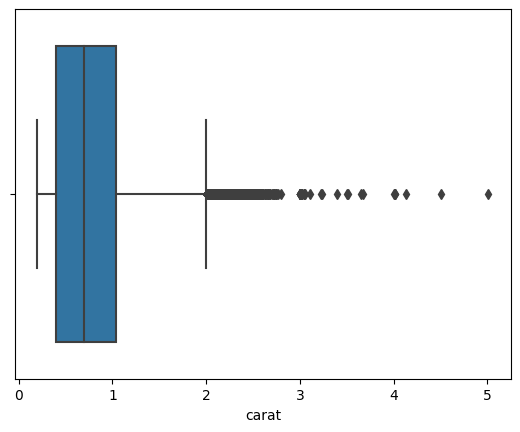

In [ ]:
# visualisasi fitur numerik
# Carat
sns.boxplot(x=diamonds['carat'])

<Axes: xlabel='table'>

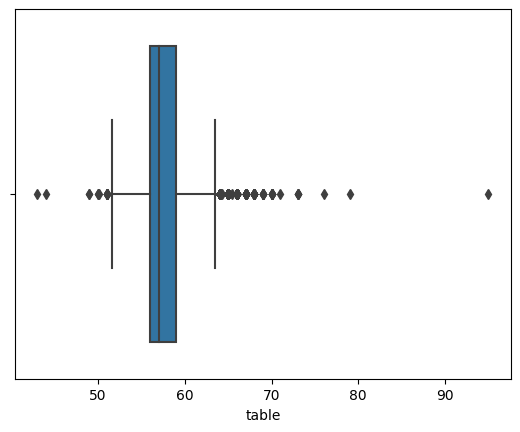

In [ ]:
#fitur table
sns.boxplot(x=diamonds['table'])

<Axes: xlabel='x'>

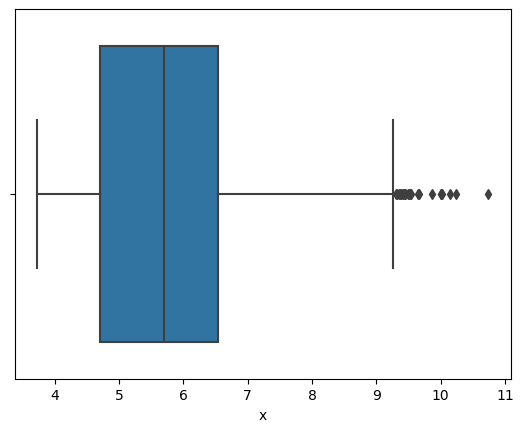

In [ ]:
# fitur x
sns.boxplot(x=diamonds['x'])

Jika kita perhatikan kembali, pada beberapa fitur numerik di atas terdapat outliers. Tugas Anda selanjutnya adalah mengatasi outliers tersebut dengan metode yang telah kita bahas sebelumnya yaitu metode IQR. Anda akan menggunakan metode IQR untuk mengidentifikasi outlier yang berada di luar Q1 dan Q3. Nilai apa pun yang berada di luar batas ini dianggap sebagai outlier.

In [ ]:
Q1 = diamonds.quantile(0.25)
Q3 = diamonds.quantile(0.75)
IQR=Q3-Q1
diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
diamonds.shape

<ipython-input-47-635809bb4404>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = diamonds.quantile(0.25)
<ipython-input-47-635809bb4404>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = diamonds.quantile(0.75)
<ipython-input-47-635809bb4404>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  diamonds=diamonds[~((diamonds<(Q1-1.5*IQR))|(diamonds>(Q3+1.5*IQR))).any(axis=1)]


(47524, 10)

Dataset sekarang telah bersih dan memiliki 47.524 sampel.

# Univariate Analysis

In [ ]:
from pandas.core.arrays import categorical
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


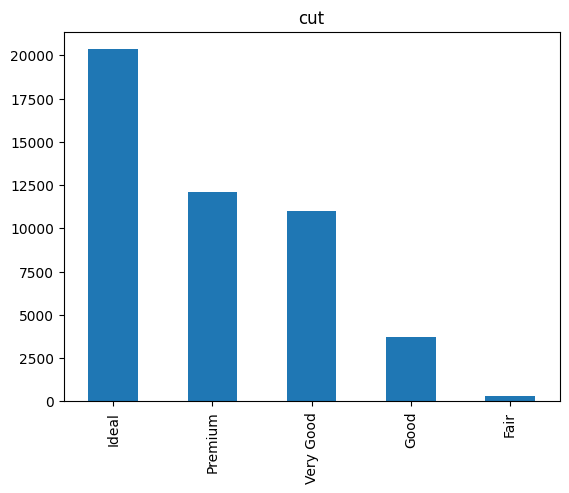

In [ ]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Terdapat 5 kategori pada fitur Cut, secara berurutan dari jumlahnya yang paling banyak yaitu: Ideal, Premium, Very Good, Good, dan Fair. Dari data persentase dapat kita simpulkan bahwa lebih dari 60% sampel merupakan diamonds tipe grade tinggi, yaitu grade Ideal dan Premium.

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


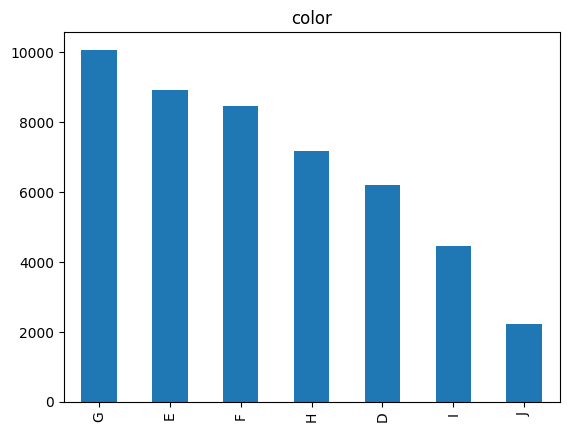

In [ ]:
#Fitur color
#cek fitur color

feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

Berdasarkan deskripsi Variabel, urutan kategori warna dari yang paling buruk ke yang paling bagus adalah J,I,H,G,F,E dan D. Dari grafik diatas, dapat kita simpulkan bahwa sebagian besar grade barada pada grade menengah yaitu G,F,H

Fitur Clarity
Dengan code yang sama untuk fitur clarity, hasil plotnya adalah sebagai berikut:

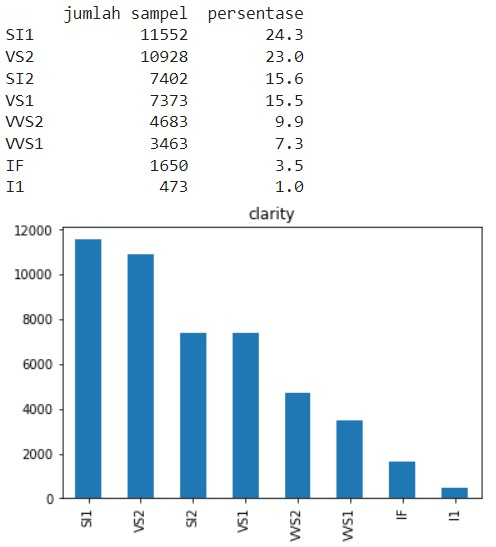

Berdasarkan informasi dari deskripsi variabel, fitur Clarity terdiri dari 8 kategori dari yang paling buruk ke yang paling baik, yaitu: I1, SI2, SI1, VS2, VS1, VVS2, VVS1, dan IF.

1. 'IF' - Internally Flawless
2. 'VVS2' - Very Very Slight Inclusions
3. 'VVS1' - Very Very Slight Inclusions
4. 'VS1' - Very Slight Inclusions
5. 'VS2' - Very Slight Inclusions
6. 'SI2' - Slight Inclusions
7. 'SI1' - Slight Inclusions
8. 'I1' - Imperfect

Dari grafik kita bisa menyimpulkan bahwa sebagian besar fitur merupakan grade rendah, yaitu SI1, SI2, dan VS2.

# Numerical Features

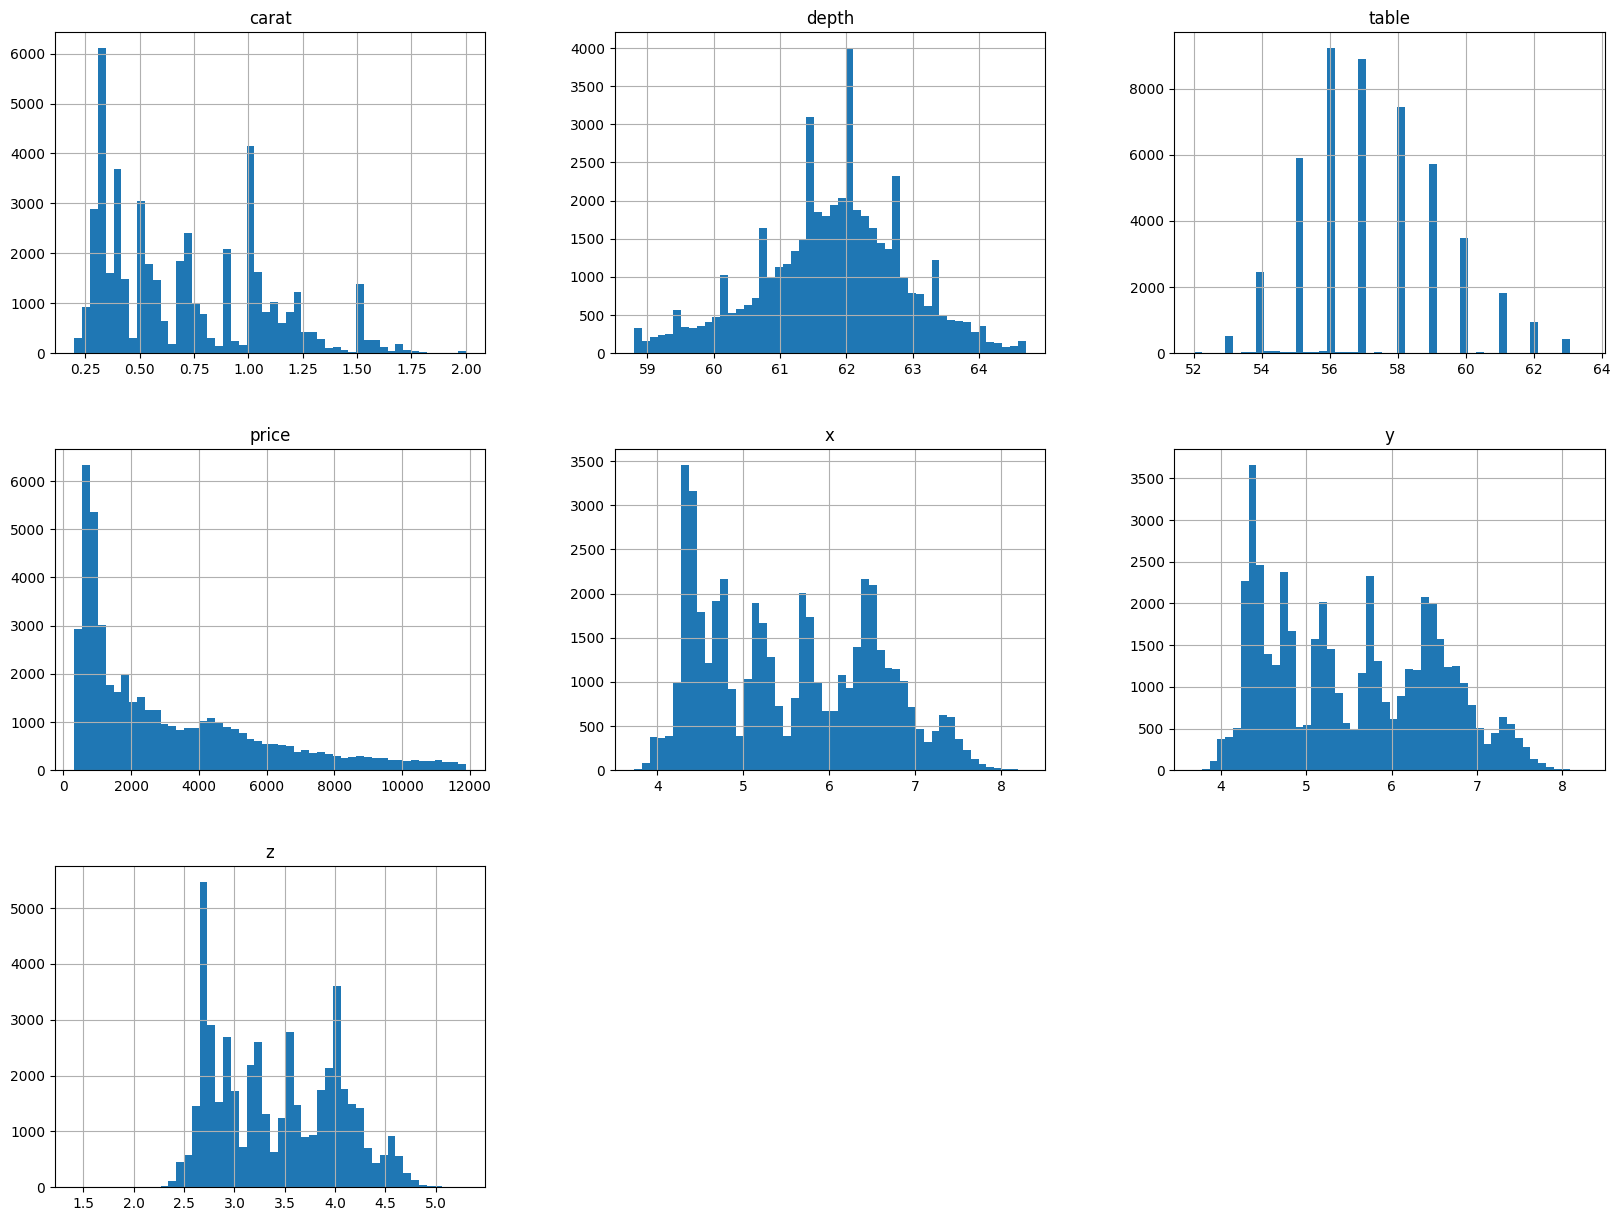

In [ ]:
diamonds.hist(bins=50, figsize=(20,15))
plt.show()

Mari amati histogram di atas, khususnya histogram untuk variabel "price" yang merupakan fitur target (label) pada data kita. Dari histogram "price", kita bisa memperoleh beberapa informasi, antara lain:

* Peningkatan harga diamonds sebanding dengan penurunan jumlah sampel. Hal ini dapat kita lihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
* Rentang harga diamonds cukup tinggi yaitu dari skala ratusan dolar Amerika hingga sekitar $11800.
Setengah harga berlian bernilai di bawah $2500.
* Distribusi harga miring ke kanan (right-skewed). Hal ini akan berimplikasi pada model.

# Exploratory Data Analysis - Multivariate Analysis
Multivariate EDA menunjukkan hubungan antara dua atau lebih variabel pada data. Multivariate EDA yang menunjukkan hubungan antara dua variabel biasa disebut sebagai bivariate EDA. Selanjutnya, kita akan melakukan analisis data pada fitur kategori dan numerik.

# Categorical Features
Pada tahap ini, kita akan mengecek rata-rata harga terhadap masing-masing fitur untuk mengetahui pengaruh fitur kategori terhadap harga.

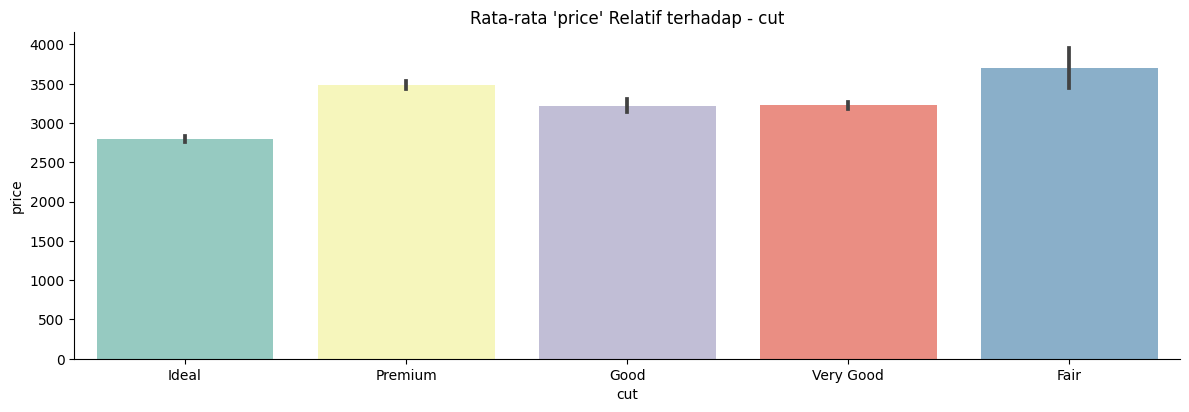

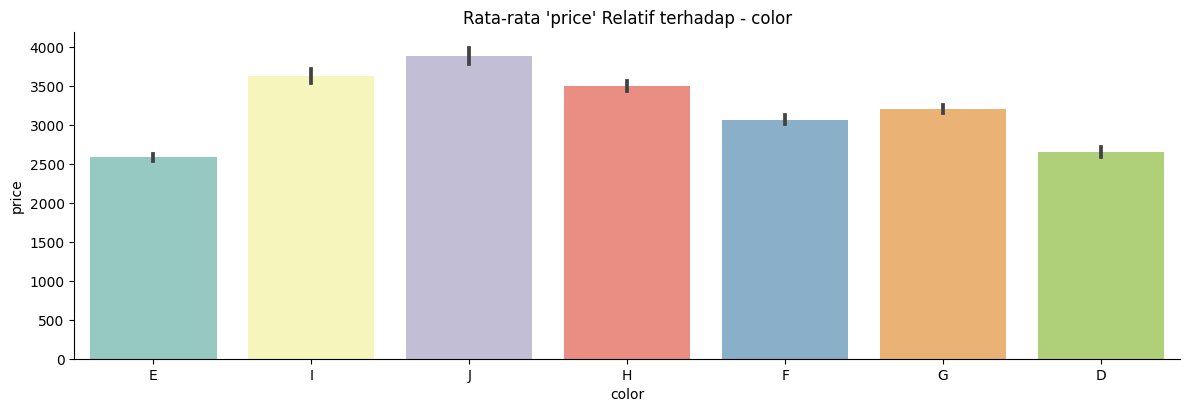

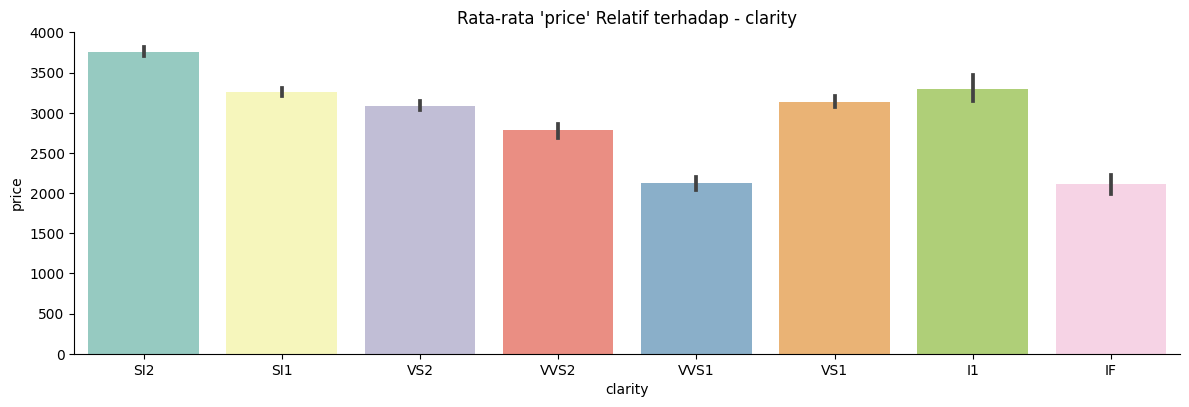

In [ ]:
categorical_features = diamonds.select_dtypes(include='object').columns.to_list()
for col in categorical_features:
    sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=diamonds, palette="Set3")
    plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

Dengan mengamati rata-rata harga relatif terhadap fitur kategori di atas, kita memperoleh insight sebagai berikut:

* Pada fitur ‘cut’, rata-rata harga cenderung mirip. Rentangnya berada antara 3500 hingga 4500. Grade tertinggi yaitu grade Ideal memiliki harga rata-rata terendah diantara grade lainnya. Sehingga, fitur cut memiliki pengaruh atau dampak yang kecil terhadap rata-rata harga.
* Pada fitur ‘color’, semakin rendah grade warna, harga diamonds justru semakin tinggi. Dari sini dapat disimpulkan bahwa warna memiliki pengaruh yang rendah terhadap harga.
* Pada fitur ‘clarity’, secara umum, diamond dengan grade lebih rendah memiliki harga yang lebih tinggi. Hal ini berarti bahwa fitur ‘clarity’ memiliki pengaruh yang rendah terhadap harga.
Kesimpulan akhir, fitur kategori memiliki pengaruh yang rendah terhadap harga.


# Numerical Features
Untuk mengamati hubungan antara fitur numerik, kita akan menggunakan fungsi pairplot(). Kita juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr(). Tidak perlu menunggu lama, mari kita langsung analisis datanya.

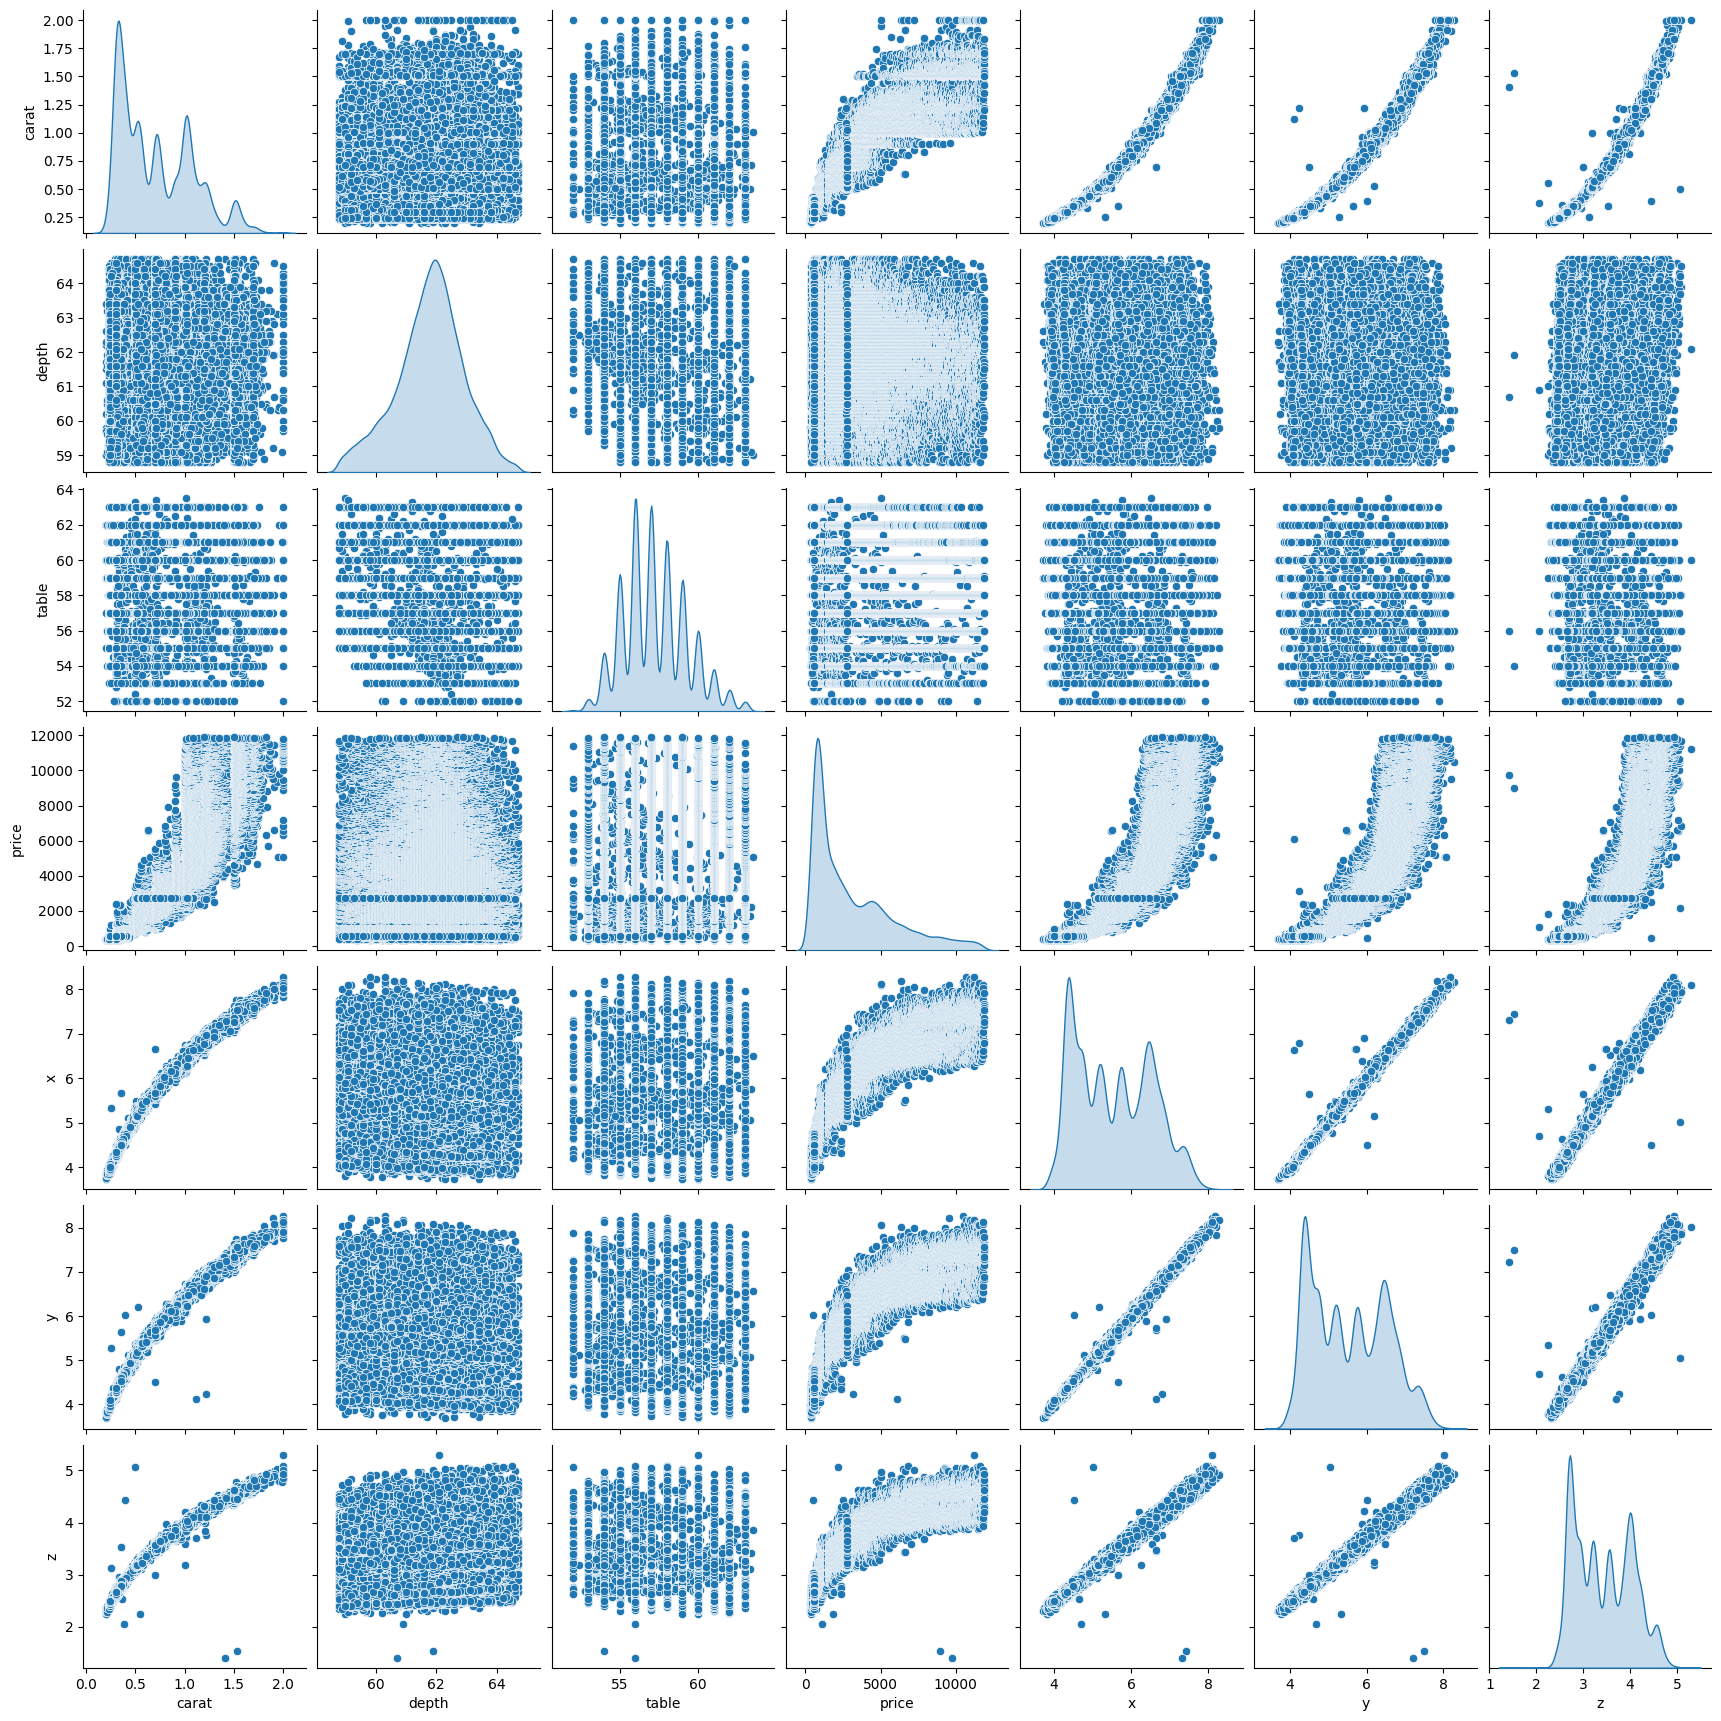

In [ ]:
# mengamati hubungan antara fitur numerik dengan fungsi pairplot()
sns.pairplot(diamonds, diag_kind = 'kde')

Fungsi pairplot dari library seaborn menunjukkan relasi pasangan dalam dataset. Misalnya, relasi antara fitur ‘x’ pada sumbu x dengan fitur ‘z’ pada sumbu y atau relasi antara fitur ‘carat’ pada sumbu x dengan ‘price’ pada sumbu y. Dari grafik, kita dapat melihat plot relasi masing-masing fitur numerik pada dataset.

Pada kasus ini, kita akan melihat relasi antara semua fitur numerik dengan fitur target kita yaitu ‘price’. Untuk membacanya, perhatikan fitur pada sumbu y, temukan fitur target ‘price’, dan lihatlah grafik relasi antara semua fitur pada sumbu x dengan fitur price pada sumbu y. Dalam hal ini, fitur ‘price’ berada pada baris keempat (dari atas) sumbu y (ditandai oleh kotak merah). Sehingga, kita cukup melihat relasi antar fitur numerik dengan fitur target ‘price’ pada baris tersebut saja.

Sebelum memperhatikan pola sebaran data pada grafik pairplot di atas, mari kita pahami terlebih dahulu cara membaca korelasi pada sebaran data. Korelasi pada fitur tampak dari adanya pola pada sebaran data. Sebaran data acak merupakan indikasi korelasi yang lemah (atau tidak ada korelasi sama sekali). Sedangkan, sebaran yang memiliki pola (tidak acak) merupakan indikasi adanya korelasi. Perhatikan contoh gambar berikut.



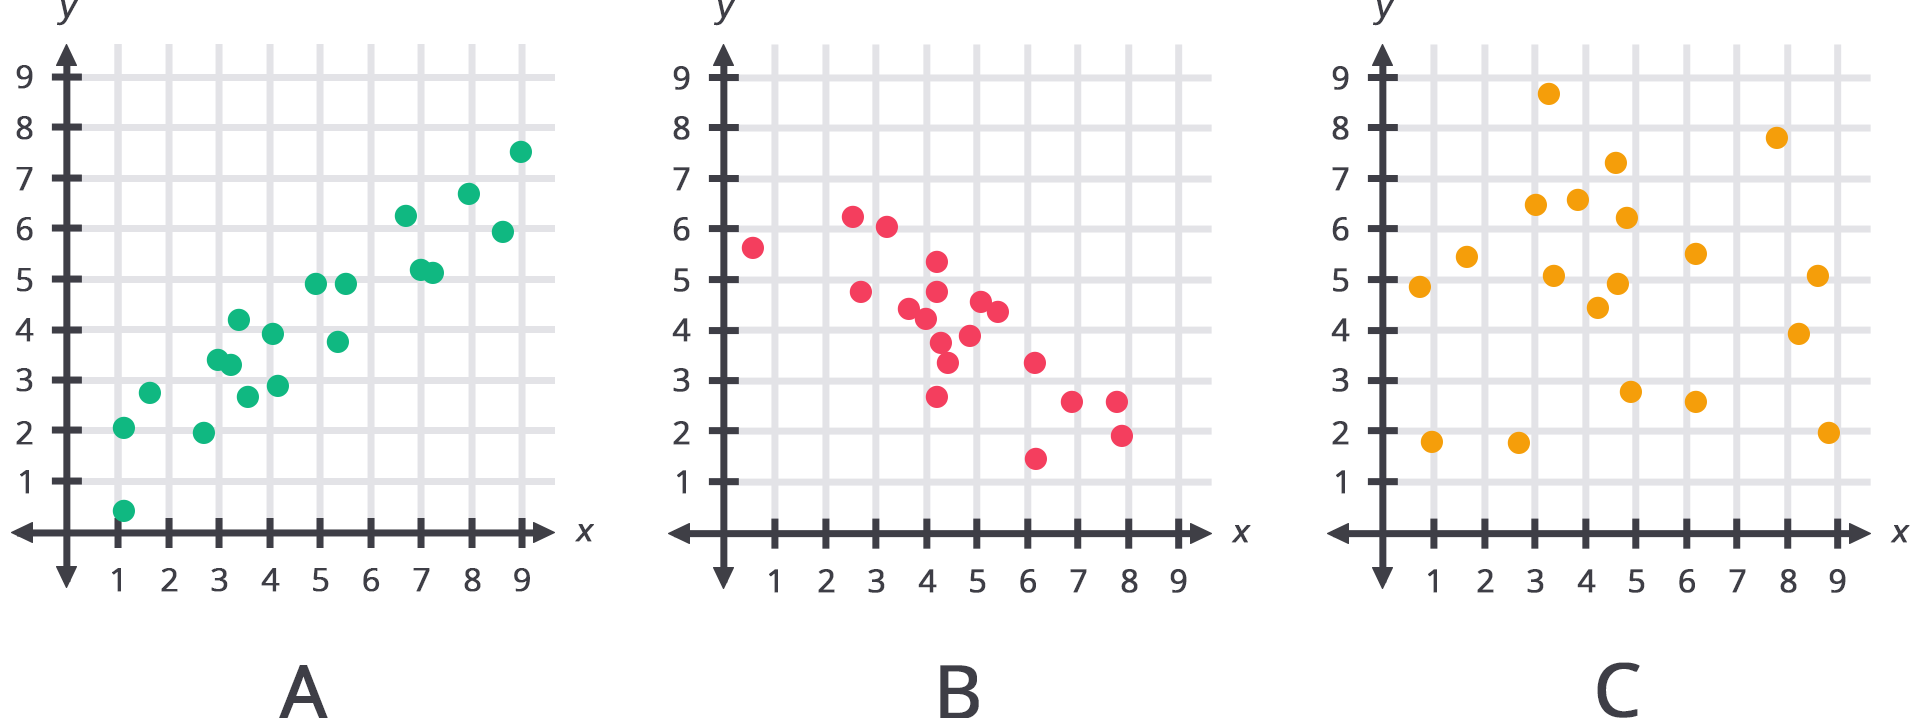

<ipython-input-55-1a32c16894b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = diamonds.corr().round(2)


Text(0.5, 1.0, 'Correlation matrix untuk fitur Numerik ')

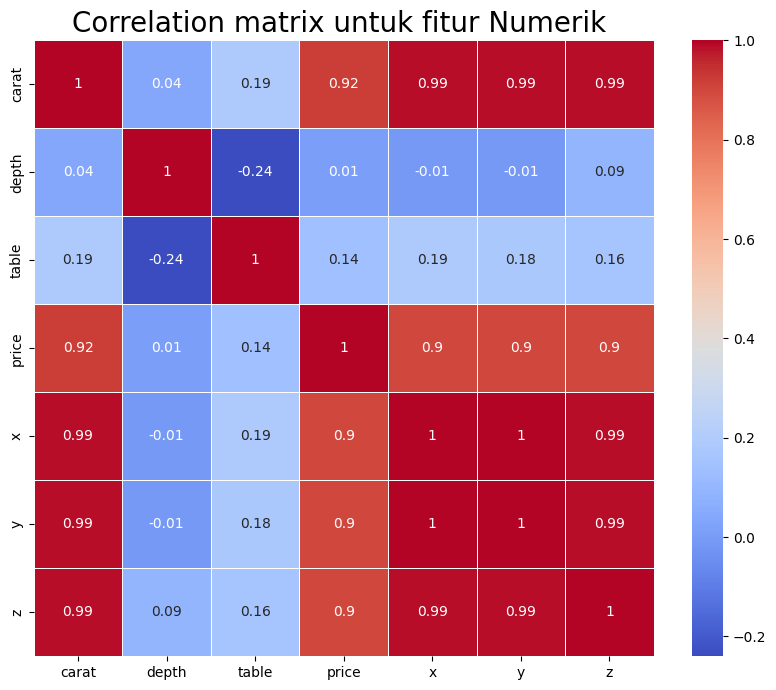

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = diamonds.corr().round(2)

# untuk meng-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation matrix untuk fitur Numerik ", size=20)

Sebelum mengamati gambar di atas, mari kita simak penjelasan mengenai hubungan korelasi antar fitur.

Koefisien korelasi berkisar antara -1 dan +1. Ia mengukur kekuatan hubungan antara dua variabel serta arahnya (positif atau negatif). Mengenai kekuatan hubungan antar variabel, semakin dekat nilainya ke 1 atau -1, korelasinya semakin kuat. Sedangkan, semakin dekat nilainya ke 0, korelasinya semakin lemah.  

Arah korelasi antara dua variabel bisa bernilai positif (nilai kedua variabel cenderung meningkat bersama-sama) maupun negatif (nilai salah satu variabel cenderung meningkat ketika nilai variabel lainnya menurun).

Nah, kembali pada grafik korelasi di atas. Jika kita amati, fitur ‘carat’, ‘x, ‘y’, dan ‘z’ memiliki skor korelasi yang besar (di atas 0.9) dengan fitur target ‘price’. Artinya, fitur 'price' berkorelasi tinggi dengan keempat fitur tersebut. Sementara itu, fitur ‘depth’ memiliki korelasi yang sangat kecil (0.01). Sehingga, fitur tersebut dapat di-drop.

In [ ]:
diamonds.drop(['depth'], inplace=True, axis=1)
diamonds.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


##DATA PREPARATION##

Data Preparation
Bayangkan Anda akan memasak. Sebelum memulai, tentunya Anda perlu melakukan persiapan terlebih dahulu. Tahap ini meliputi proses mencuci dan menakar bahan makanan, memotong-motong, serta membagi bahan mana yang akan dimasukkan terlebih dahulu dan bahan mana yang dimasukkan belakangan. Selain itu, kadang Anda juga melakukan pra-pemrosesan bahan makanan, misalnya merebus telur atau daging terlebih dahulu sebelum dimasak bersama bahan-bahan lainnya.

Demikian juga saat bekerja dengan data. Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan. Ada beberapa tahapan yang umum dilakukan pada data preparation, antara lain, seleksi fitur, transformasi data, feature engineering, dan dimensionality reduction.

Pada bagian ini kita akan melakukan empat tahap persiapan data, yaitu:

* Encoding fitur kategori.
* Reduksi dimensi dengan Principal
* Component Analysis (PCA).
* Pembagian dataset dengan fungsi       train_test_split dari library sklearn.
Standarisasi.
* Tanpa menunggu lama, yuk langsung kita terapkan proses ini pada dataset.




**Encoding Fitur Kategori**

Encoding Fitur Kategori
Untuk melakukan proses encoding fitur kategori, salah satu teknik yang umum dilakukan adalah teknik one-hot-encoding. Library scikit-learn menyediakan fungsi ini untuk mendapatkan fitur baru yang sesuai sehingga dapat mewakili variabel kategori. Kita memiliki tiga variabel kategori dalam dataset kita, yaitu ‘cut’, ‘color’, dan ‘clarity. Mari kita lakukan proses encoding ini dengan fitur get_dummies.

In [ ]:
from sklearn.preprocessing import  OneHotEncoder
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color')],axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity')],axis=1)
diamonds.drop(['cut','color','clarity'], axis=1, inplace=True)
diamonds.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


**Reduksi Dimensi dengan PCA**
Teknik reduksi (pengurangan) dimensi adalah prosedur yang mengurangi jumlah fitur dengan tetap mempertahankan informasi pada data. Teknik pengurangan dimensi yang paling populer adalah Principal Component Analysis atau disingkat menjadi PCA. Ia adalah teknik untuk mereduksi dimensi, mengekstraksi fitur, dan mentransformasi data dari “n-dimensional space” ke dalam sistem berkoordinat baru dengan dimensi m, di mana m lebih kecil dari n.

PCA bekerja menggunakan metode aljabar linier. Ia mengasumsikan bahwa sekumpulan data pada arah dengan varians terbesar merupakan yang paling penting (utama). PCA umumnya digunakan ketika variabel dalam data memiliki korelasi yang tinggi. Korelasi tinggi ini menunjukkan data yang berulang atau redundant.

Karena hal inilah, teknik PCA digunakan untuk mereduksi variabel asli menjadi sejumlah kecil variabel baru yang tidak berkorelasi linier, disebut komponen utama (PC). Komponen utama ini dapat menangkap sebagian besar varians dalam variabel asli. Sehingga, saat teknik PCA diterapkan pada data, ia hanya akan menggunakan komponen utama dan mengabaikan sisanya.

Berikut penjelasan untuk masing-masing komponen utama (PC):

* PC pertama mewakili arah varians maksimum dalam data. Ia paling banyak menangkap informasi dari semua fitur dalam data.
* PC kedua menangkap sebagian besar informasi yang tersisa setelah PC pertama.
* PC ketiga menangkap sebagian besar informasi yang tersisa setelah PC pertama, PC kedua, dst.

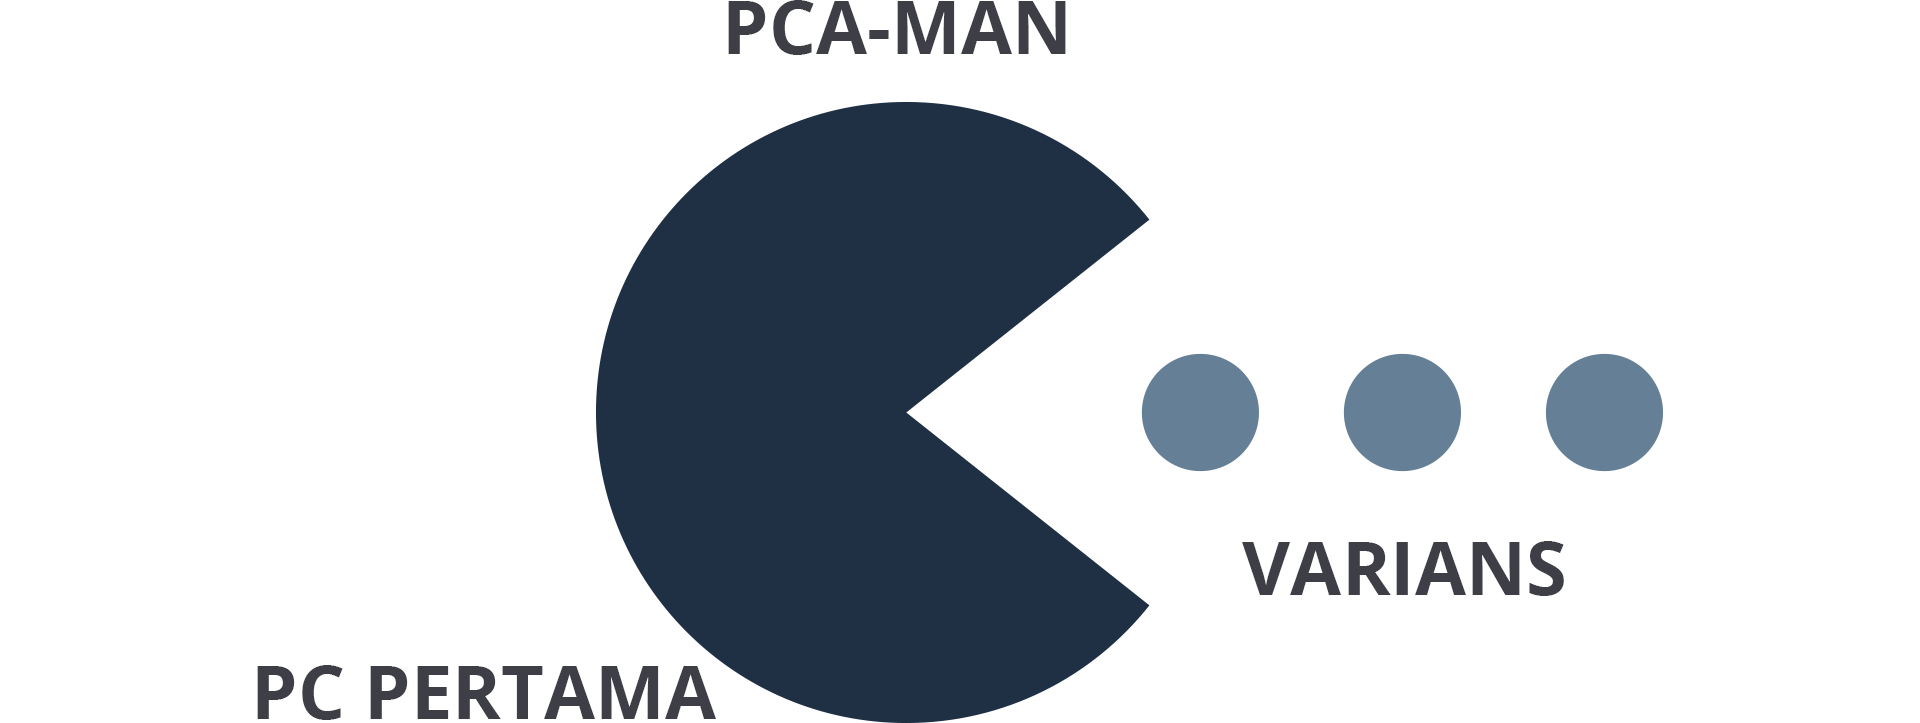

Jika kita cek menggunakan fungsi pairplot, ketiga fitur ukuran diamonds dalam kolom ‘x’, ‘y’, dan ‘z’ memiliki korelasi yang tinggi. Hal ini karena ketiga fitur ini memiliki informasi yang sama, yaitu ukuran diamonds.

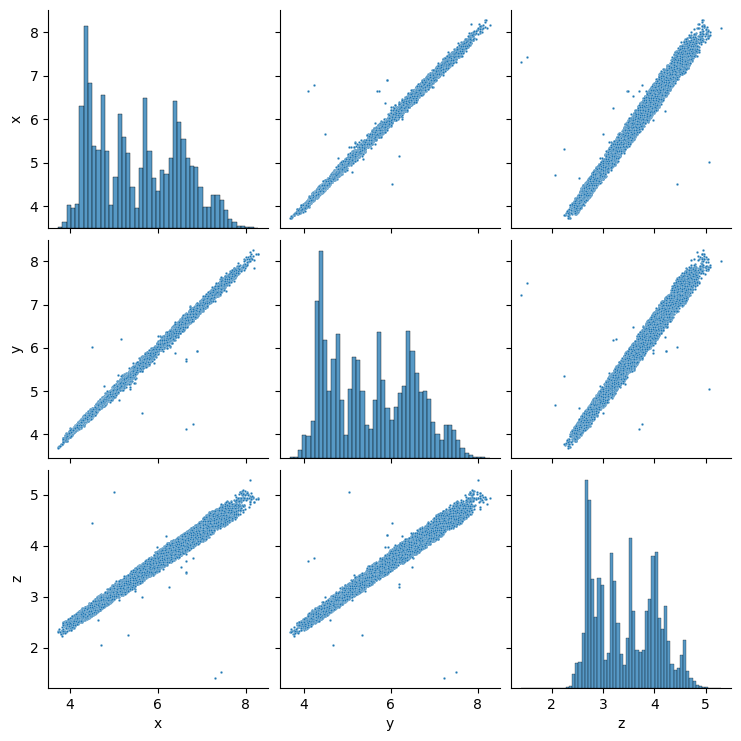

In [ ]:
# Reduksi Dimensi dengan PCA
sns.pairplot(diamonds[['x','y','z']], plot_kws={"s": 3});

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=123)
pca.fit(diamonds[['x','y','z']])
princ_comp = pca.transform(diamonds[['x','y','z']])

Kode di atas memanggil class PCA() dari library scikit-learn. Paremeter yang kita masukkan ke dalam class adalah n_components dan random_state. Parameter n_components merupakan jumlah komponen atau dimensi, dalam kasus kita jumlahnya ada 3, yaitu 'x', 'y', dan 'z'.

Sedangkan, parameter random_state berfungsi untuk mengontrol random number generator yang digunakan. Parameter ini berupa bilangan integer dan nilainya bebas. Pada kasus ini, kita menerapkan random_state = 123. Berapa pun nilai integer yang kita tentukan --selama itu bilangan integer, ia akan memberikan hasil yang sama setiap kali dilakukan pemanggilan fungsi (dalam kasus kita, class PCA).

Menentukan parameter random_state bertujuan untuk dapat memastikan bahwa hasil pembagian dataset konsisten dan memberikan data yang sama setiap kali model dijalankan. Jika tidak ditentukan, maka tiap kali melakukan split, kita akan mendapatkan data train dan tes berbeda. Hal ini berpengaruh terhadap akurasi model ML yang menjadi berbeda tiap kali di-run.

Nah, setelah menerapkan class PCA, kita bisa mengetahui proporsi informasi dari ketiga komponen tadi.

In [ ]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

rti dari output di atas adalah, 99.8% informasi pada ketiga fitur ‘x’, ‘y’, ‘z’ terdapat pada PC pertama. Sedangkan sisanya, sebesar 0.2% dan 0.1% terdapat pada PC kedua dan ketiga. Perhatikanlah, jumlahnya jadi > 100%. Hal ini disebabkan oleh proses pembulatan (round) dalam 3 desimal ya, jadi tidak perlu khawatir.

Berdasarkan hasil ini, kita akan mereduksi fitur (dimensi) dan hanya mempertahankan PC (komponen) pertama saja. PC pertama ini akan menjadi fitur dimensi atau ukuran berlian menggantikan ketiga fitur lainnya ('x', 'y', 'z'). Kita beri nama fitur ini 'dimension'.

Sekarang Anda akan membuat fitur baru bernama 'dimension' untuk menggantikan fitur 'x', 'y', dan'z' . Oleh karena itu, mari jalankan kode di atas dengan beberapa perubahan berikut:

* Gunakan n_component = 1, karena kali ini, jumlah komponen kita hanya satu.
* Fit model dengan data masukan.
* Tambahkan fitur baru ke dataset dengan nama 'dimension' dan lakukan proses transformasi.
* Drop kolom ‘x’, ‘y’, dan ‘z’.

In [ ]:

from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(diamonds[['x','y','z']])
diamonds['dimension'] = pca.transform(diamonds.loc[:, ('x','y','z')]).flatten()
diamonds.drop(['x','y','z'], axis=1, inplace=True)

**TRAIN-TEST-SPLIT**

Membagi dataset menjadi data latih (train) dan data uji (test) merupakan hal yang harus kita lakukan sebelum membuat model. Kita perlu mempertahankan sebagian data yang ada untuk menguji seberapa baik generalisasi model terhadap data baru. Ketahuilah bahwa setiap transformasi yang kita lakukan pada data juga merupakan bagian dari model. Karena data uji (test set) berperan sebagai data baru, kita perlu melakukan semua proses transformasi dalam data latih. Inilah alasan mengapa langkah awal adalah membagi dataset sebelum melakukan transformasi apa pun [25]. Tujuannya adalah agar kita tidak mengotori data uji dengan informasi yang kita dapat dari data latih.

Selama ini, kesalahan yang sering dilakukan oleh praktisi machine learning adalah melakukan proses scaling (penyekalaan) seperti normalisasi dan standarisasi sebelum membagi data menjadi data latih dan data uji. Hal ini berpotensi menimbulkan kebocoran data (data leakage). Proses scaling pada seluruh dataset membuat model memiliki informasi mengenai distribusi pada data uji. Informasi tentang data uji (yang seharusnya tidak dilihat oleh model) turut diikutsertakan dalam proses transformasi data latih. Oleh karena itu, kita akan melakukan proses scaling secara terpisah antara data latih dan data uji.

Kembali pada bahasan mengenai train_test_split, proporsi pembagian data latih dan uji biasanya adalah 80:20. Ingatlah bahwa proporsi ini hanya kebiasaan umum saja. Tujuan dari data uji adalah untuk untuk mengukur kinerja model pada data baru. Jadi, jika dataset yang kita miliki berukuran sangat kecil, misalnya kurang dari 1.000 sampel, maka pembagian 80:20 ini cukup ideal. Namun,  jika memiliki dataset berukuran besar, kita perlu memikirkan strategi pembagian dataset lain agar proporsi data uji tidak terlalu banyak.

Sebagai contoh, Anda memiliki dataset berjumlah 5 juta sampel. Dengan proporsi pembagian 80:20, maka data uji akan berjumlah 1 juta sampel. Tentu ini merupakan jumlah yang terlalu banyak karena kita tidak membutuhkan 1 juta sampel hanya untuk proses pengujian. Dalam kasus proses pengujian ini sebenarnya kita cukup menggunakan 1-2% data atau sebanyak 100.000 hingga 200.000 sampel saja.

Pada modul ini, kita akan menggunakan proporsi pembagian sebesar 90:10 dengan fungsi train_test_split dari sklearn.

In [ ]:
from sklearn.model_selection import train_test_split

X = diamonds.drop(["price"],axis =1)
y = diamonds["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [ ]:
#mengecek jumlah sampel data pada masing masing bagian

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 47524
Total # of sample in train dataset: 42771
Total # of sample in test dataset: 4753


**Standarisasi**

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk fitur numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn,

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji. Untuk lebih jelasnya, mari kita terapkan StandardScaler pada data.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
536,-0.026226,0.864091,0.143464
21293,1.348407,1.359644,1.353588
45577,-0.511390,-0.622566,-0.372761
37379,-0.834833,-0.622566,-0.905790
38240,-0.861787,-0.622566,-0.813165


Seperti yang telah disebutkan sebelumnya, proses standarisasi mengubah nilai rata-rata (mean) menjadi 0 dan nilai standar deviasi menjadi 1. Untuk mengecek nilai mean dan standar deviasi pada setelah proses standarisasi, jalankan kode ini:

In [ ]:
X_train[numerical_features].describe().round(4)

,carat,table,dimension
count,42771.0000,42771.0000,42771.0000
mean,0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000
min,-1.3739,-2.6048,-1.8867
25%,-0.8887,-0.6226,-0.9283
50%,-0.2688,-0.1270,-0.1063
75%,0.8093,0.8641,0.8847
max,3.4777,3.0941,2.6998


 Perhatikan tabel di atas, sekarang nilai mean = 0 dan standar deviasi = 1.

**Model Development**

Sampailah kita pada tahap pengembangan model setelah semua proses yang kita lewati dari business understanding, data understanding, dan data preparation. Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan, antara lain:

* K-Nearest Neighbor
* Random Forest
* Boosting Algorithm

Apakah Anda sudah familier menggunakan algoritma-algoritma di atas? Atau ada yang baru mendengar algoritma-algoritma ini? Tidak apa-apa, kita akan bahas sama-sama.

##Model Development dengan K-Nearest Neighbor##

Pertama, kita akan bekerja dengan algoritma K-NN. Sebelum menulis code, Anda perlu memahami apa itu KNN dan bagaimana KNN bekerja.

KNN adalah algoritma yang relatif sederhana dibandingkan dengan algoritma lain. Algoritma KNN menggunakan ‘kesamaan fitur’ untuk memprediksi nilai dari setiap data yang baru. Dengan kata lain, setiap data baru diberi nilai berdasarkan seberapa mirip titik tersebut dalam set pelatihan.

KNN bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain dengan memilih sejumlah k tetangga terdekat (dengan k adalah sebuah angka positif). Nah, itulah mengapa algoritma ini dinamakan K-nearest neighbor (sejumlah k tetangga terdekat). KNN bisa digunakan untuk kasus klasifikasi dan regresi. Pada modul ini, kita akan menggunakannya untuk kasus regresi.

Bagaimana algoritma KNN bekerja pada kasus regresi? Perhatikan penjelasan dan ilustrasi berikut ya.

Bayangkan Anda ingin memprediksi berapa lama waktu yang diperlukan untuk perjalanan dari rumah ke kantor. Setiap hari selama beberapa minggu, Anda mencatat waktu berangkat dan lama perjalanan yang dibutuhkan hingga sampai di kantor. Waktu perjalanan Anda tentu dipengaruhi oleh beberapa hal, misalnya arus lalu lintas yang bervariasi di pagi hari. Hal ini menyebabkan waktu perjalanan Anda berubah, tergantung jam berapa Anda berangkat. Contoh grafik waktu keberangkatan dan lama perjalanan dapat dilihat pada gambar berikut.

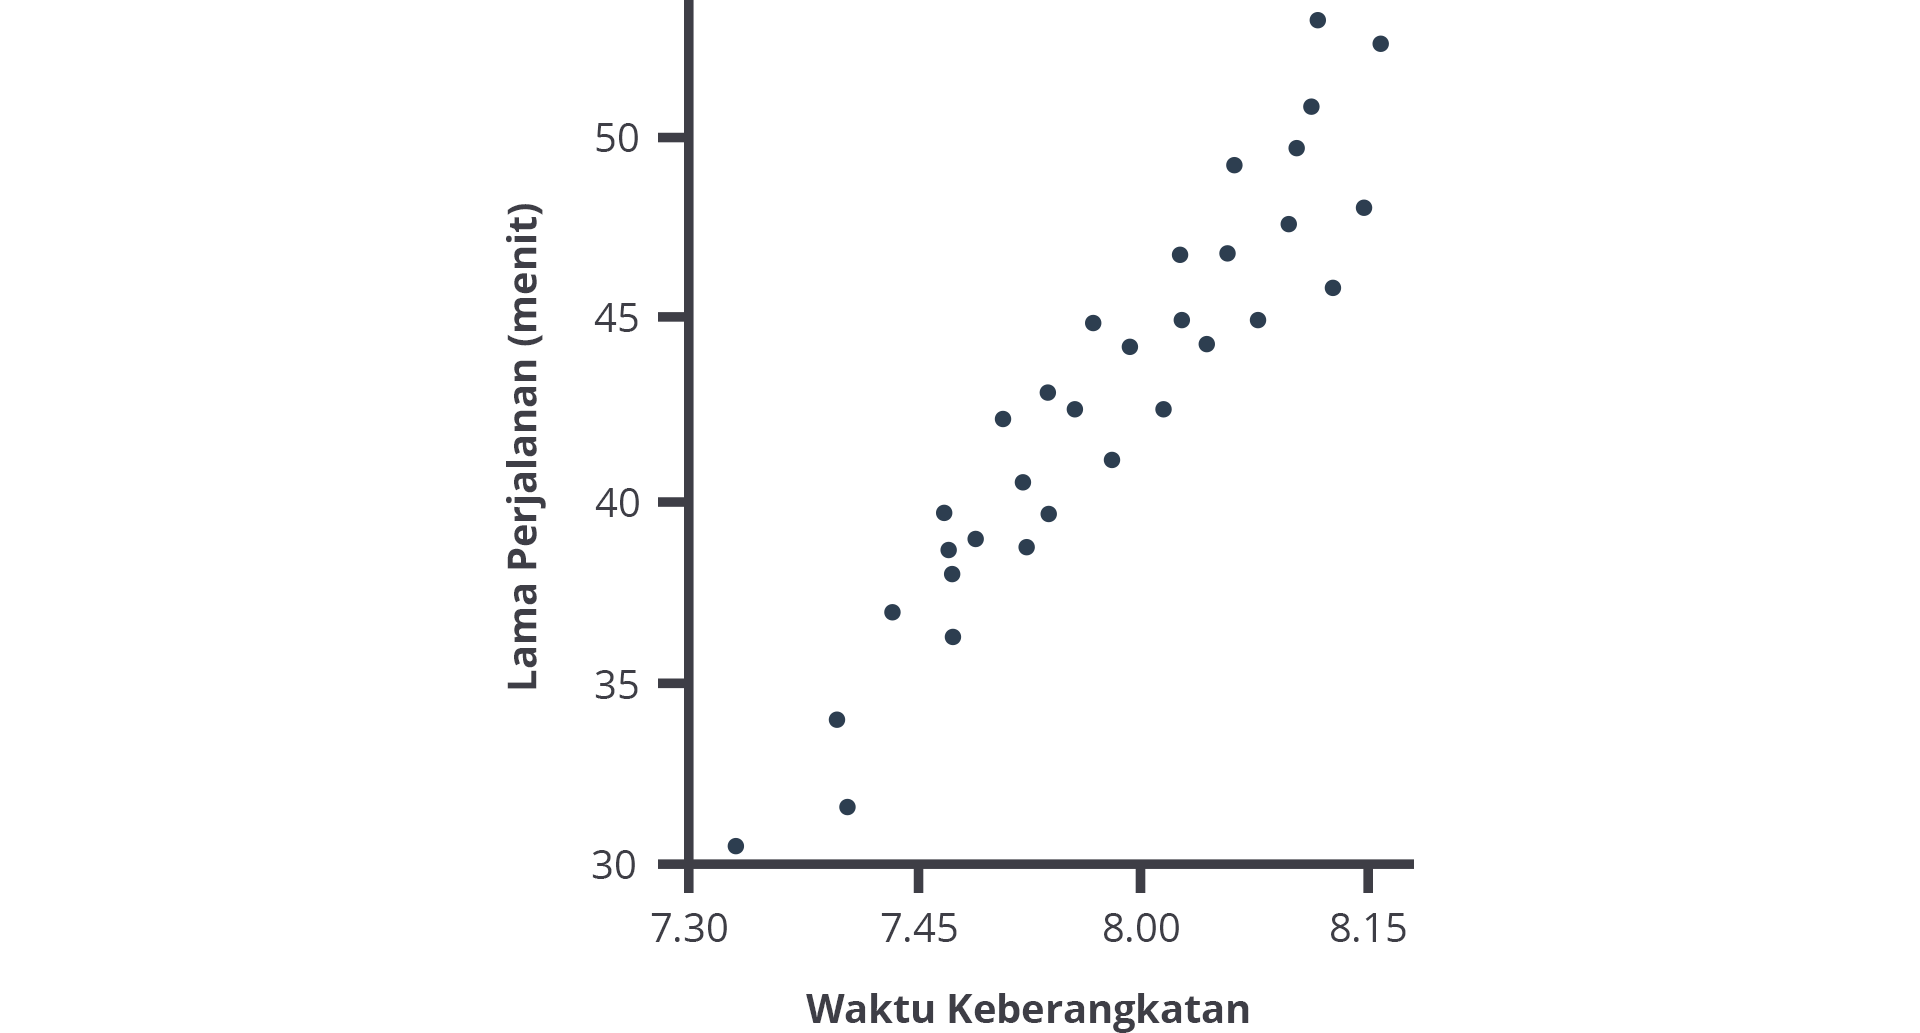

Kemudian, dengan memilih sebuah nilai X pada sumbu Waktu Keberangkatan, kita akan menentukan tiga titik (k=3) prediksi paling dekat dengan nilai X yang dipilih. Pada grafik ini ditandai dengan lingkaran merah pada titik hitam. Nilai prediksi terbaik untuk X berdasarkan ketiga titik ini adalah titik kecil berwarna merah. Perhatikanlah titik merah kecil di antara tiga titik hitam dengan lingkaran merah. Titik merah kecil ini diperoleh dari jarak rata-rata ketiga titik hitam dengan lingkaran merah.

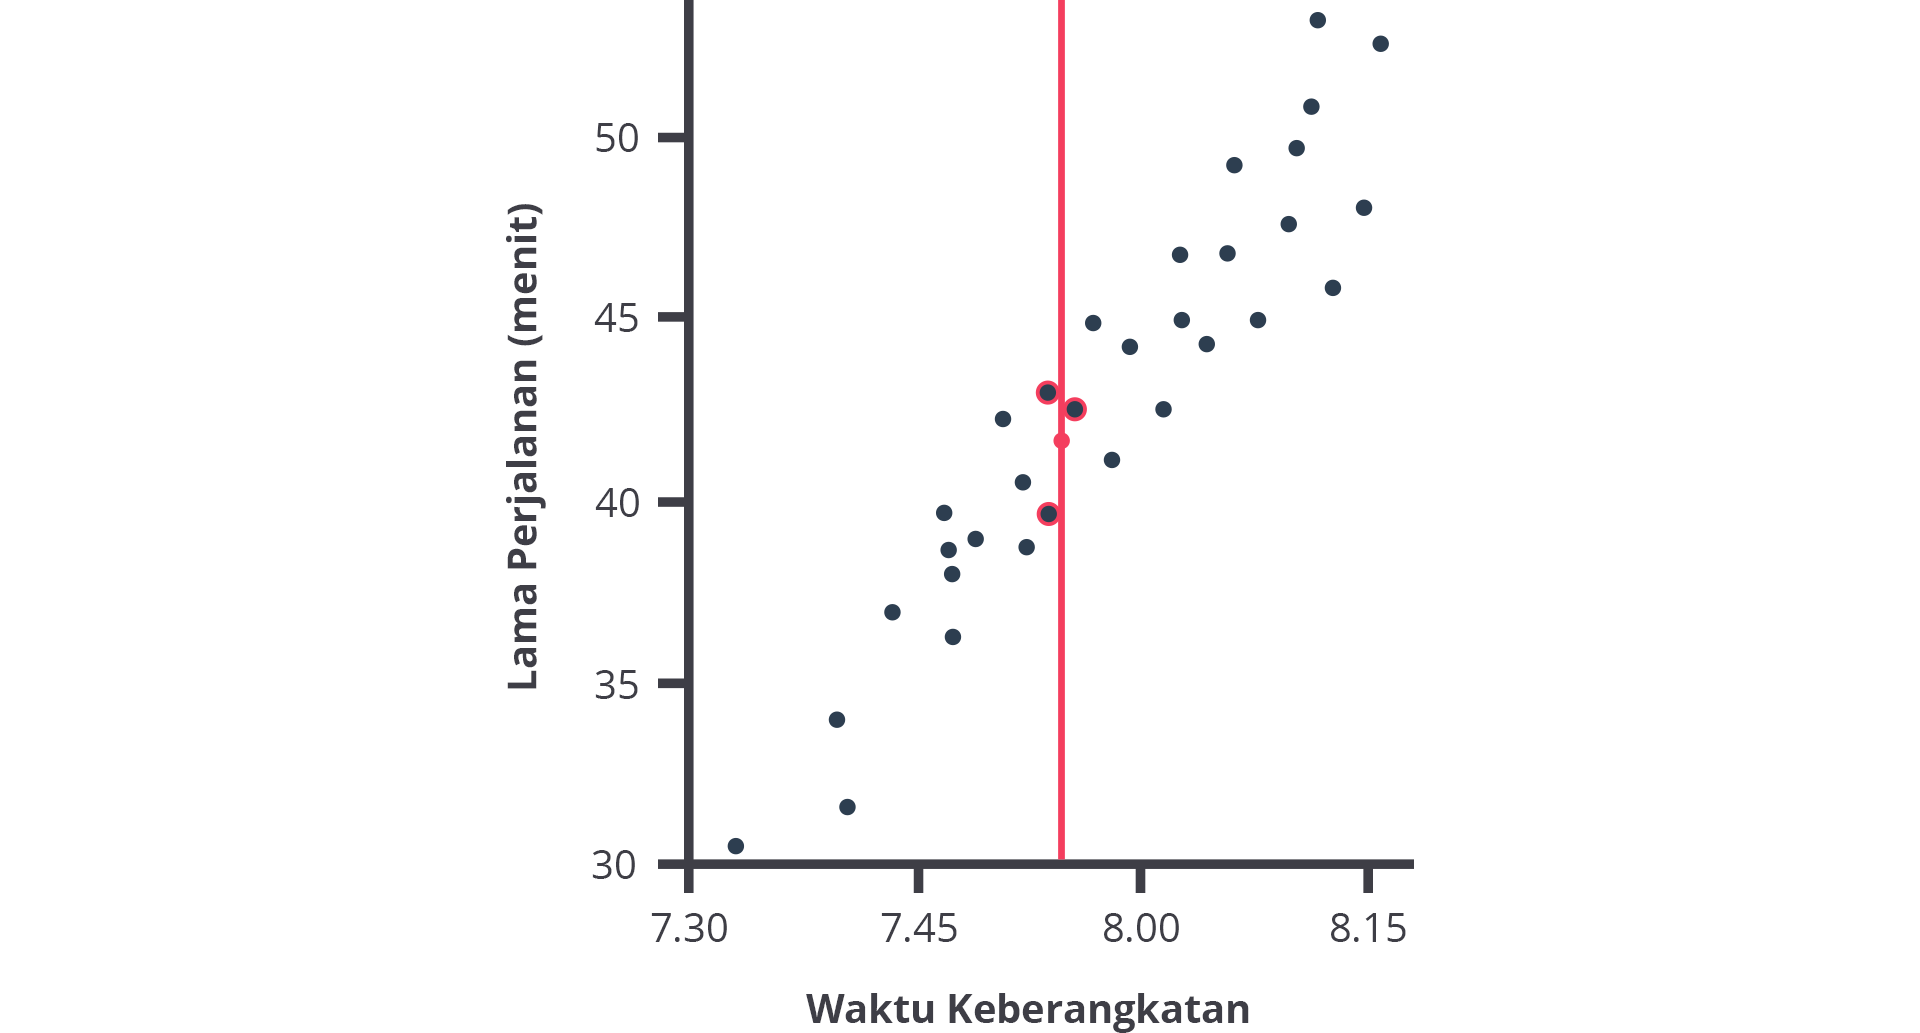

Selanjutnya, bayangkan Anda melakukan ini pada semua kemungkinan nilai masukan sehingga memperoleh nilai prediksi di beberapa tempat.

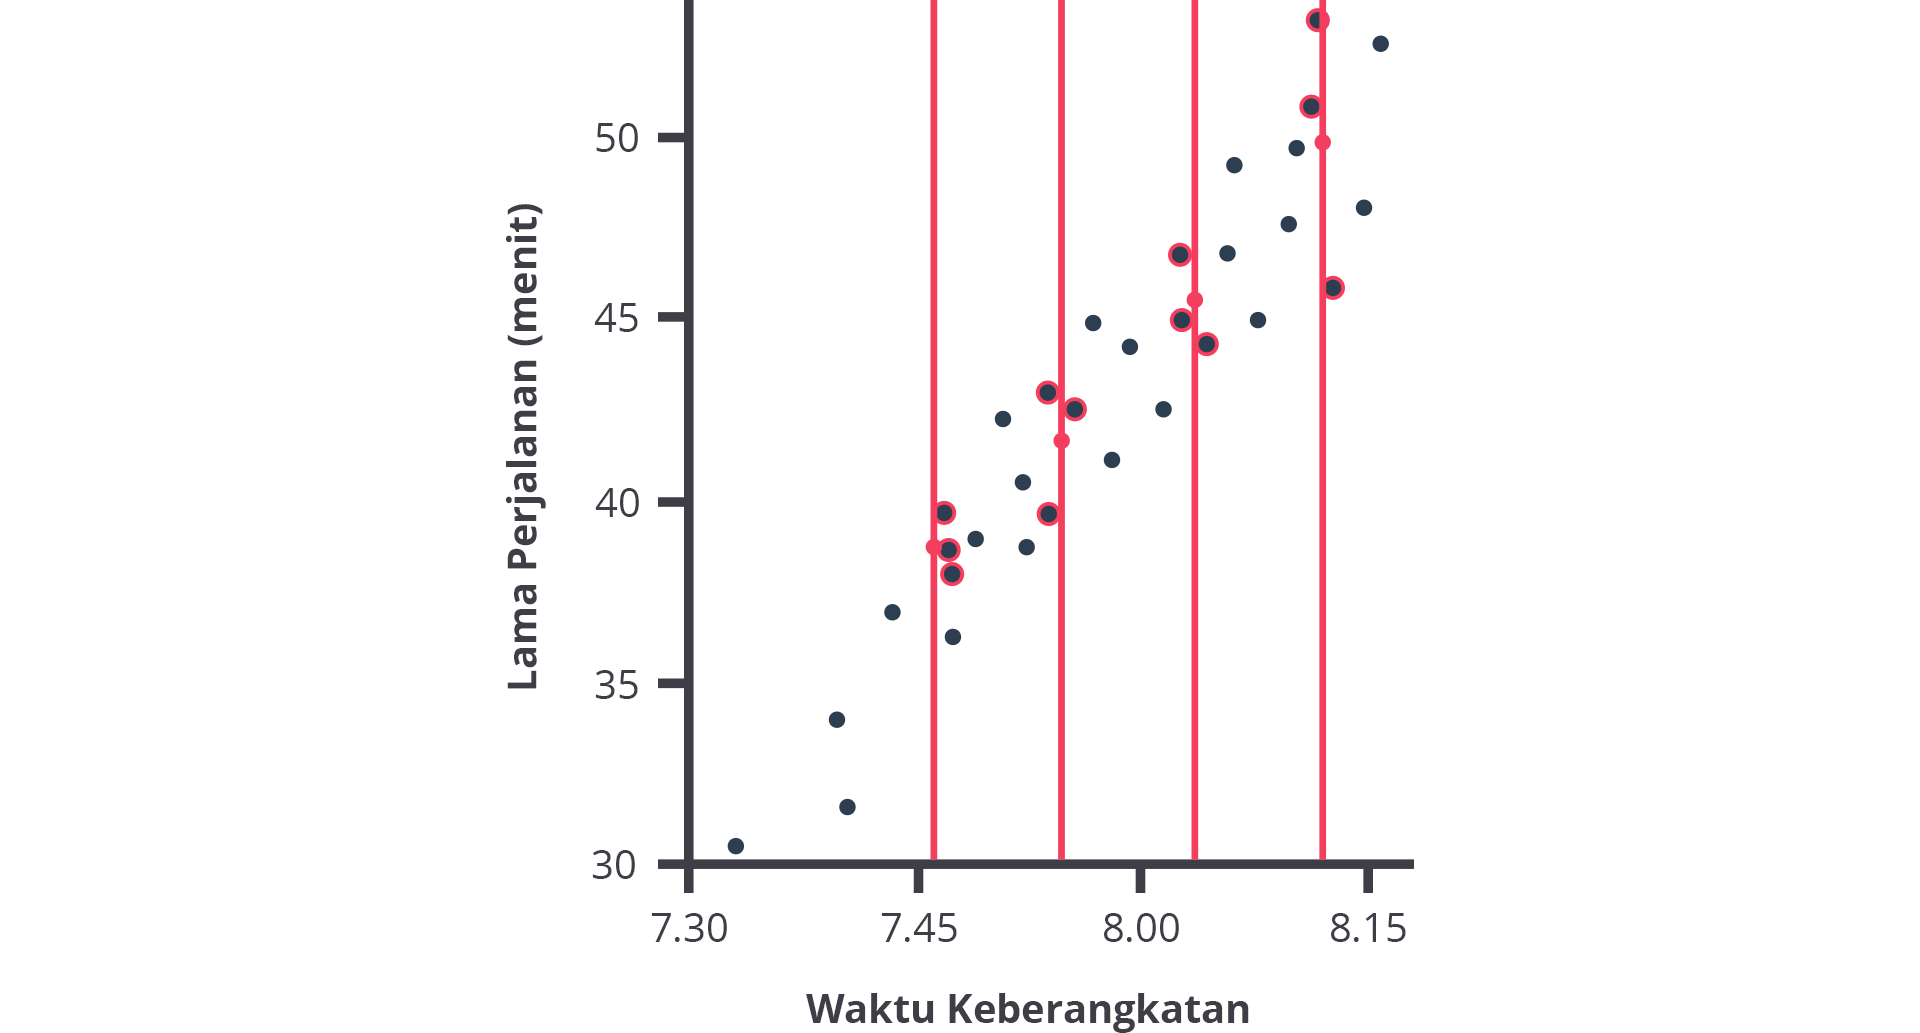

Tahap terakhir adalah menghubungkan setiap prediksi ini sehingga memberi kita hasil regresi sebagai berikut:



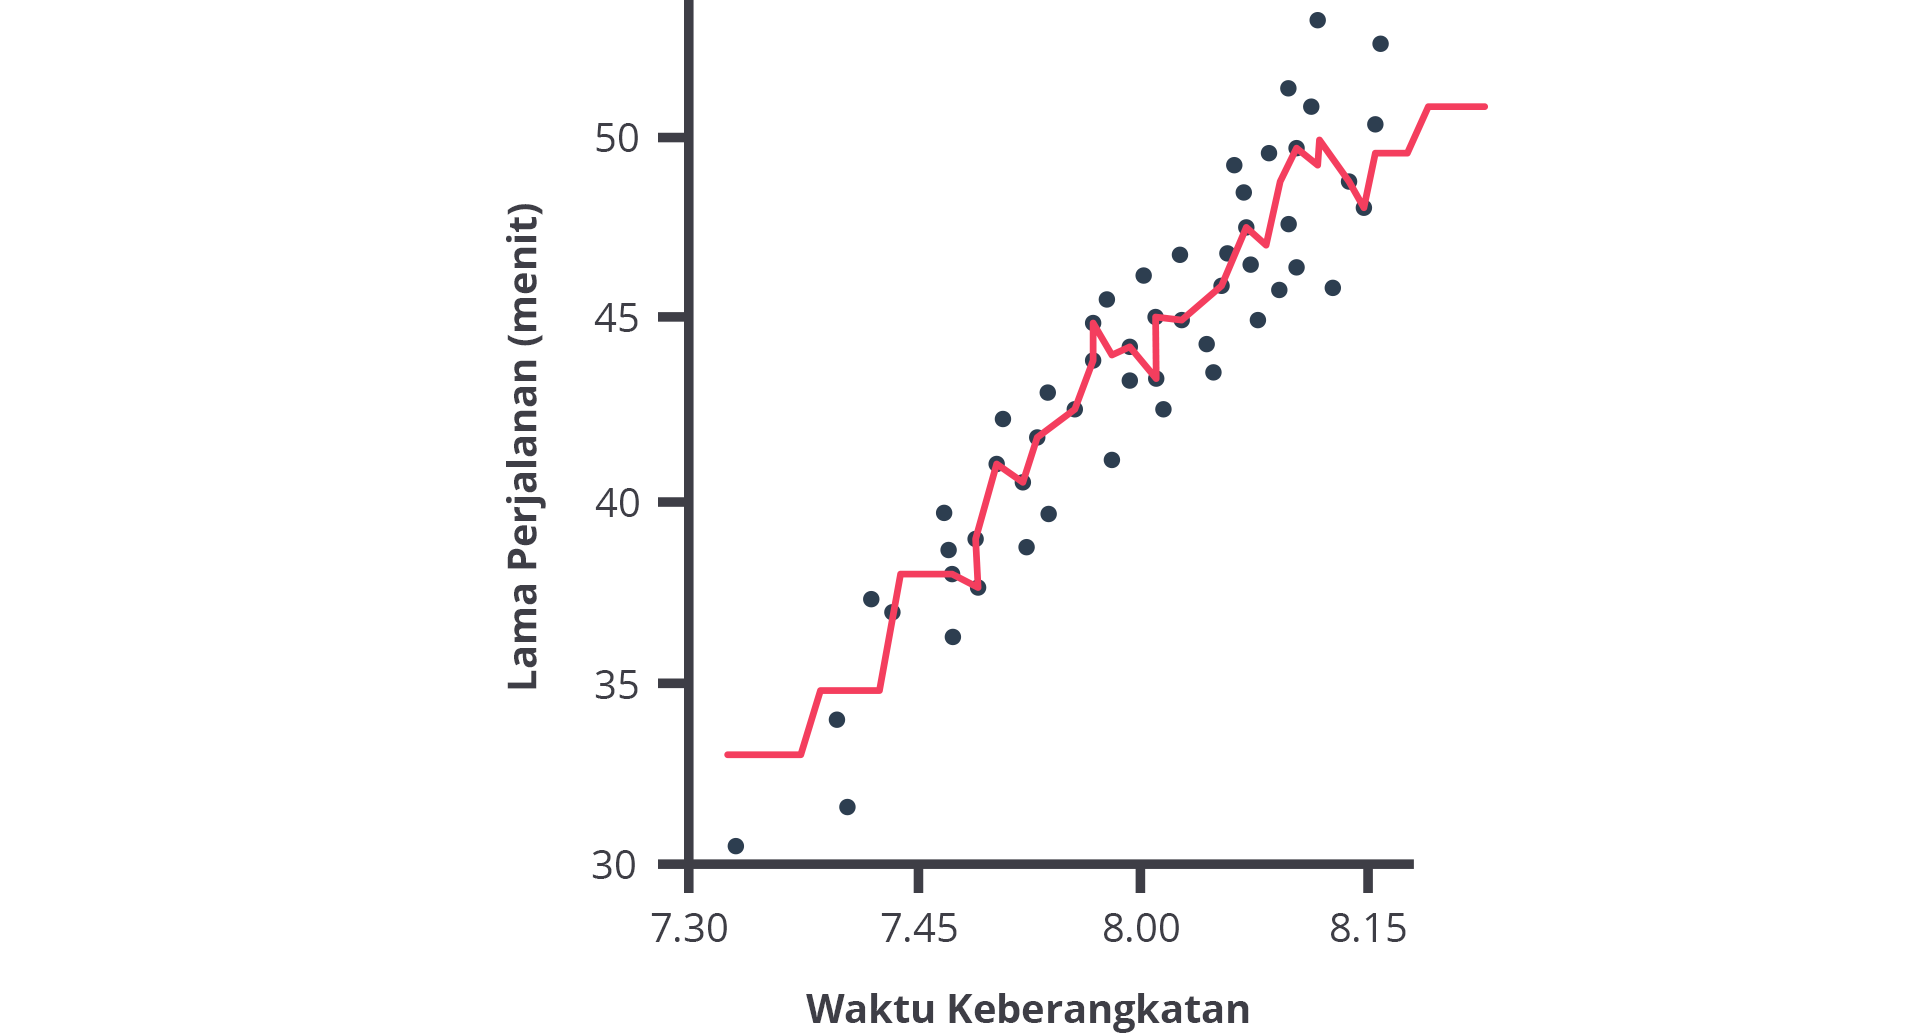

Pada contoh kasus di atas, kita membuat prediksi dengan nilai k = 3. Memilih nilai k yang lebih besar dapat membantu menghindari overfit, meskipun kadang bisa menyebabkan kehilangan kemampuan prediksi. Pada prediksi dengan nilai k = 1 (hanya mengecek satu tetangga terdekat), maka hasilnya akan sangat rigid atau kaku. Sedangkan jika kita set nilai k lebih besar, misalnya pada kasus ini k = 10, maka hasil prediksi akan lebih smooth (halus).

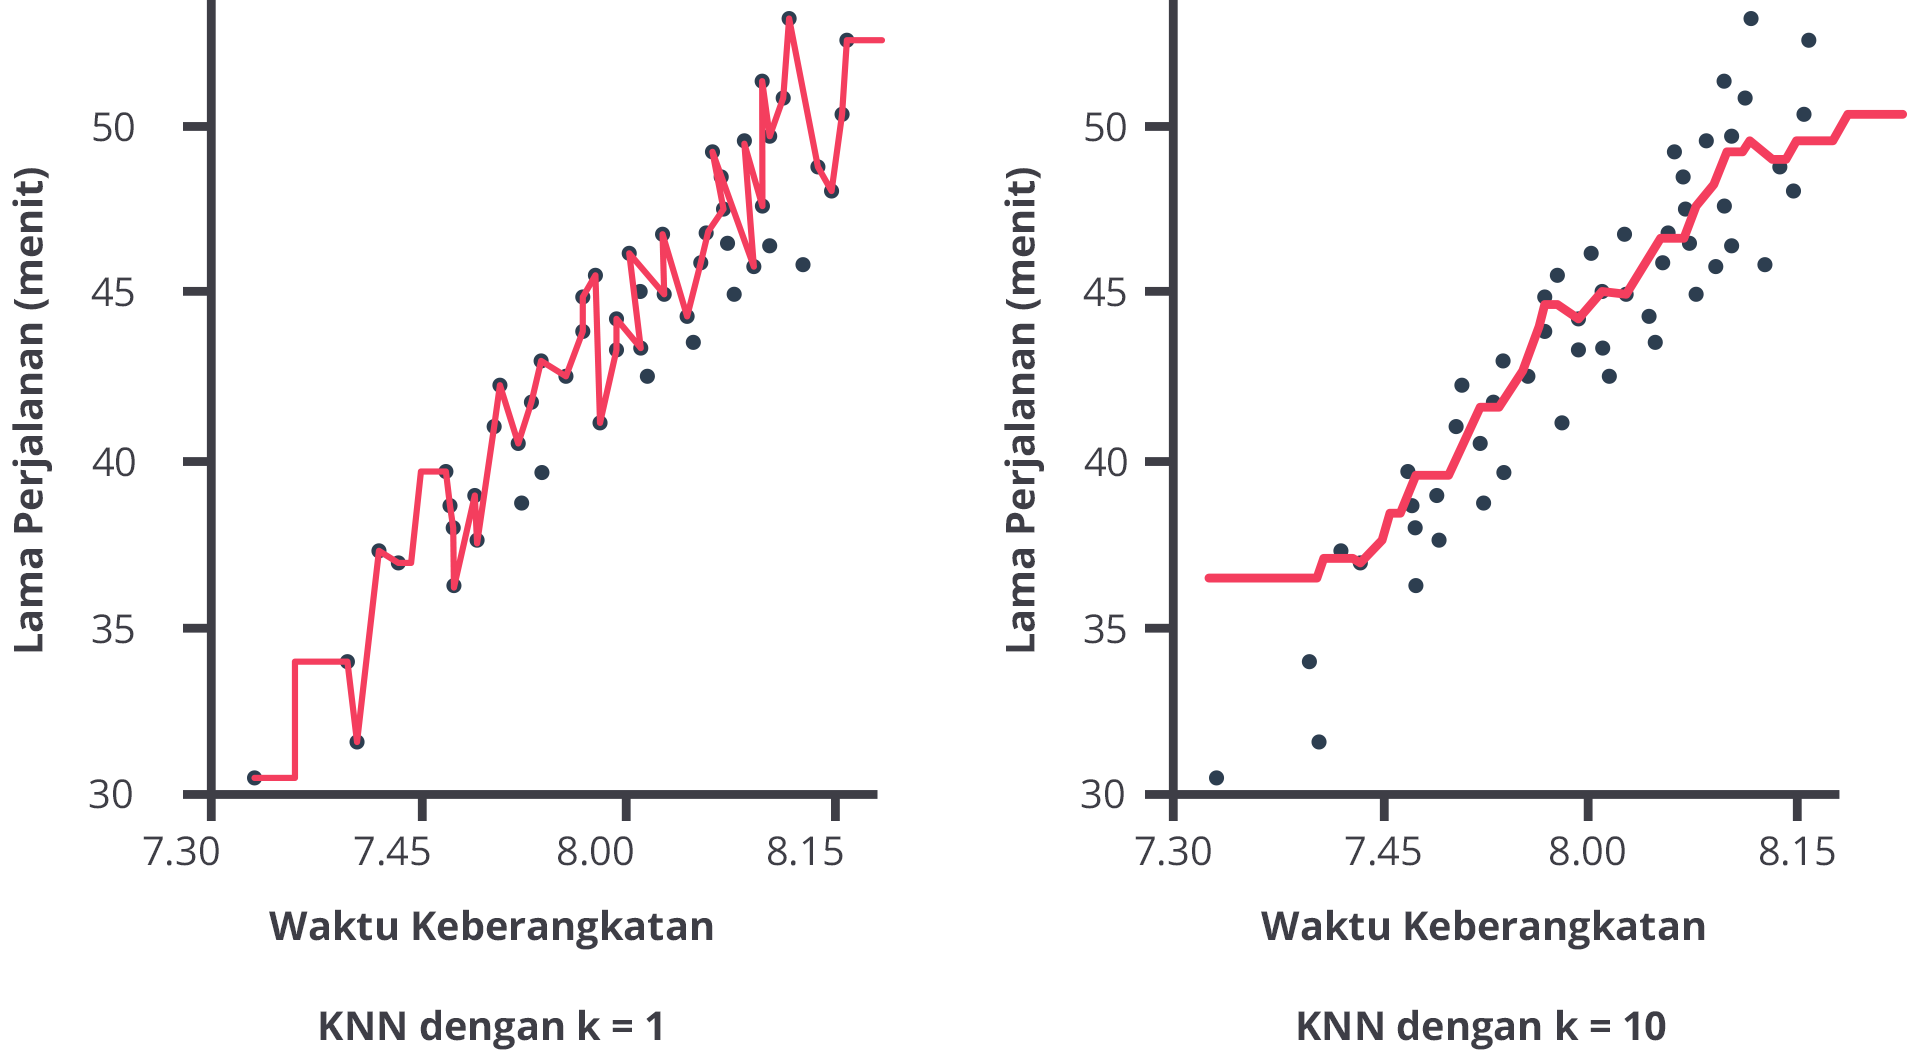

Pemilihan nilai k sangat penting dan berpengaruh terhadap performa model. Jika kita memilih k yang terlalu rendah, maka akan menghasilkan model yang overfit dan hasil prediksinya memiliki varians tinggi. Jika kita memilih k terlalu tinggi, maka model yang dihasilkan akan underfit dan prediksinya memiliki bias yang tinggi [26]. Namun, kita dapat mencoba beberapa nilai k yang berbeda, misal: nilai dari 1 hingga 20, kemudian membandingkan mana nilai yang paling sesuai untuk model.

Selanjutnya, untuk menentukan titik mana dalam data yang paling mirip dengan input baru, KNN menggunakan perhitungan ukuran jarak. Metrik ukuran jarak yang digunakan secara default pada library sklearn adalah Minkowski distance [27]. Beberapa metrik ukuran jarak yang juga sering dipakai antara lain: Euclidean distance dan Manhattan distance. Sebagai contoh, jarak Euclidean dihitung sebagai akar kuadrat dari jumlah selisih kuadrat antara titik a dan titik b. Dirumuskan sebagai berikut:

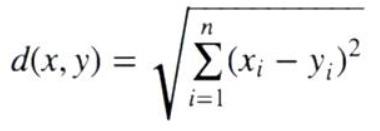

Sedangkan, Minkowski distance merupakan generalisasi dari Euclidean dan Manhattan distance. Untuk menghitungnya, perhatikan rumus berikut:

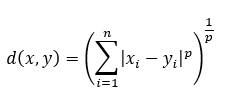

Nah, setelah memahami bagaimana KNN bekerja, yuk kita implementasikan algoritma KNN ke dalam kode.

Seperti yang telah disebutkan pada materi Model Development, kita akan membuat tiga buah model machine learning dangan algoritma berikut:

1 K-Nearest Neighbor (KNN)
2 Random Forest
3 Boosting Algorithm.
 Mari siapkan data frame untuk analisis ketiga model tersebut lebih dahulu.

In [ ]:
# menyiapkan dataFrame untuk analisa ,model
models = pd.DataFrame(index=['train_mse', 'tesr_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Nah, setelah memahami bagaimana KNN bekerja, yuk kita implementasikan algoritma KNN ke dalam kode.

Seperti yang telah disebutkan pada materi Model Development, kita akan membuat tiga buah model machine learning dangan algoritma berikut:

K-Nearest Neighbor (KNN)
Random Forest
Boosting Algorithm.
 Mari siapkan data frame untuk analisis ketiga model tersebut lebih dahulu.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

Kita menggunakan k = 10 tetangga dan metric Euclidean untuk mengukur jarak antara titik. Pada tahap ini kita hanya melatih data training dan menyimpan data testing untuk tahap evaluasi yang akan dibahas di Modul Evaluasi Model.

Meskipun algoritma KNN mudah dipahami dan digunakan, ia memiliki kekurangan jika dihadapkan pada jumlah fitur atau dimensi yang besar. Permasalahan ini sering disebut sebagai curse of dimensionality (kutukan dimensi). Pada dasarnya, permasalahan ini muncul ketika jumlah sampel meningkat secara eksponensial seiring dengan jumlah dimensi (fitur) pada data. Jadi, jika Anda menggunakan model KNN, pastikan data yang digunakan memiliki fitur yang relatif sedikit, ya!

Selanjutnya, kita akan melatih model kita dengan algoritma yang kedua, yaitu Random Forest. Sudah siap untuk mulai?

**Model Development dengan Random Forest**

Bayangkan Anda berada di hutan. Berdiri di tengah hijau rerumputan dan rimbun dedaunan. Kabut menyelimuti, tetes embun membasahi telapak kaki. Sayup terdengar kicau burung, deru angin, serta gemericik suara air terjun di kejauhan. Semburat cahaya muncul dari balik pepohonan, membuyarkan lamunan


Halo! Sadarlah, Anda tengah berada di depan layar saat ini, belajar mengenai algoritma random forest. Tentu saja ini bukan algoritma hutan yang kemunculannya bersifat acak, seperti si dia yang tiba-tiba melintas dalam benak. Random sekali.

Canda, ya. Jadi, apa itu algoritma random forest?

Algoritma random forest adalah salah satu algoritma supervised learning. Ia dapat digunakan untuk menyelesaikan masalah klasifikasi dan regresi. Random forest juga merupakan algoritma yang sering digunakan karena cukup sederhana tetapi memiliki stabilitas yang mumpuni.

Random forest merupakan salah satu model machine learning yang termasuk ke dalam kategori ensemble (group) learning. Apa itu model ensemble? Sederhananya, ia merupakan model prediksi yang terdiri dari beberapa model dan bekerja secara bersama-sama. Ide dibalik model ensemble adalah sekelompok model yang bekerja bersama menyelesaikan masalah. Sehingga, tingkat keberhasilan akan lebih tinggi dibanding model yang bekerja sendirian. Pada model ensemble, setiap model harus membuat prediksi secara independen. Kemudian, prediksi dari setiap model ensemble ini digabungkan untuk membuat prediksi akhir.

Ada dua teknik pendekatan dalam membuat model ensemble, yaitu bagging dan boosting. Jangan bingung dulu dengan istilah ini ya. Kita akan bahas satu per satu.

Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random. Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement (proses sampling dengan penggantian) [19]. Ketika kita melakukan sampling with replacement, sampel dengan nilai yang berbeda bersifat independen. Artinya, nilai suatu sampel tidak mempengaruhi sampel lainnya [28]. Akibatnya, model yang dilatih akan berbeda antara satu dan lainnya.

Berikut adalah ilustrasi pembuatan model ensemble dengan teknik bagging [19].



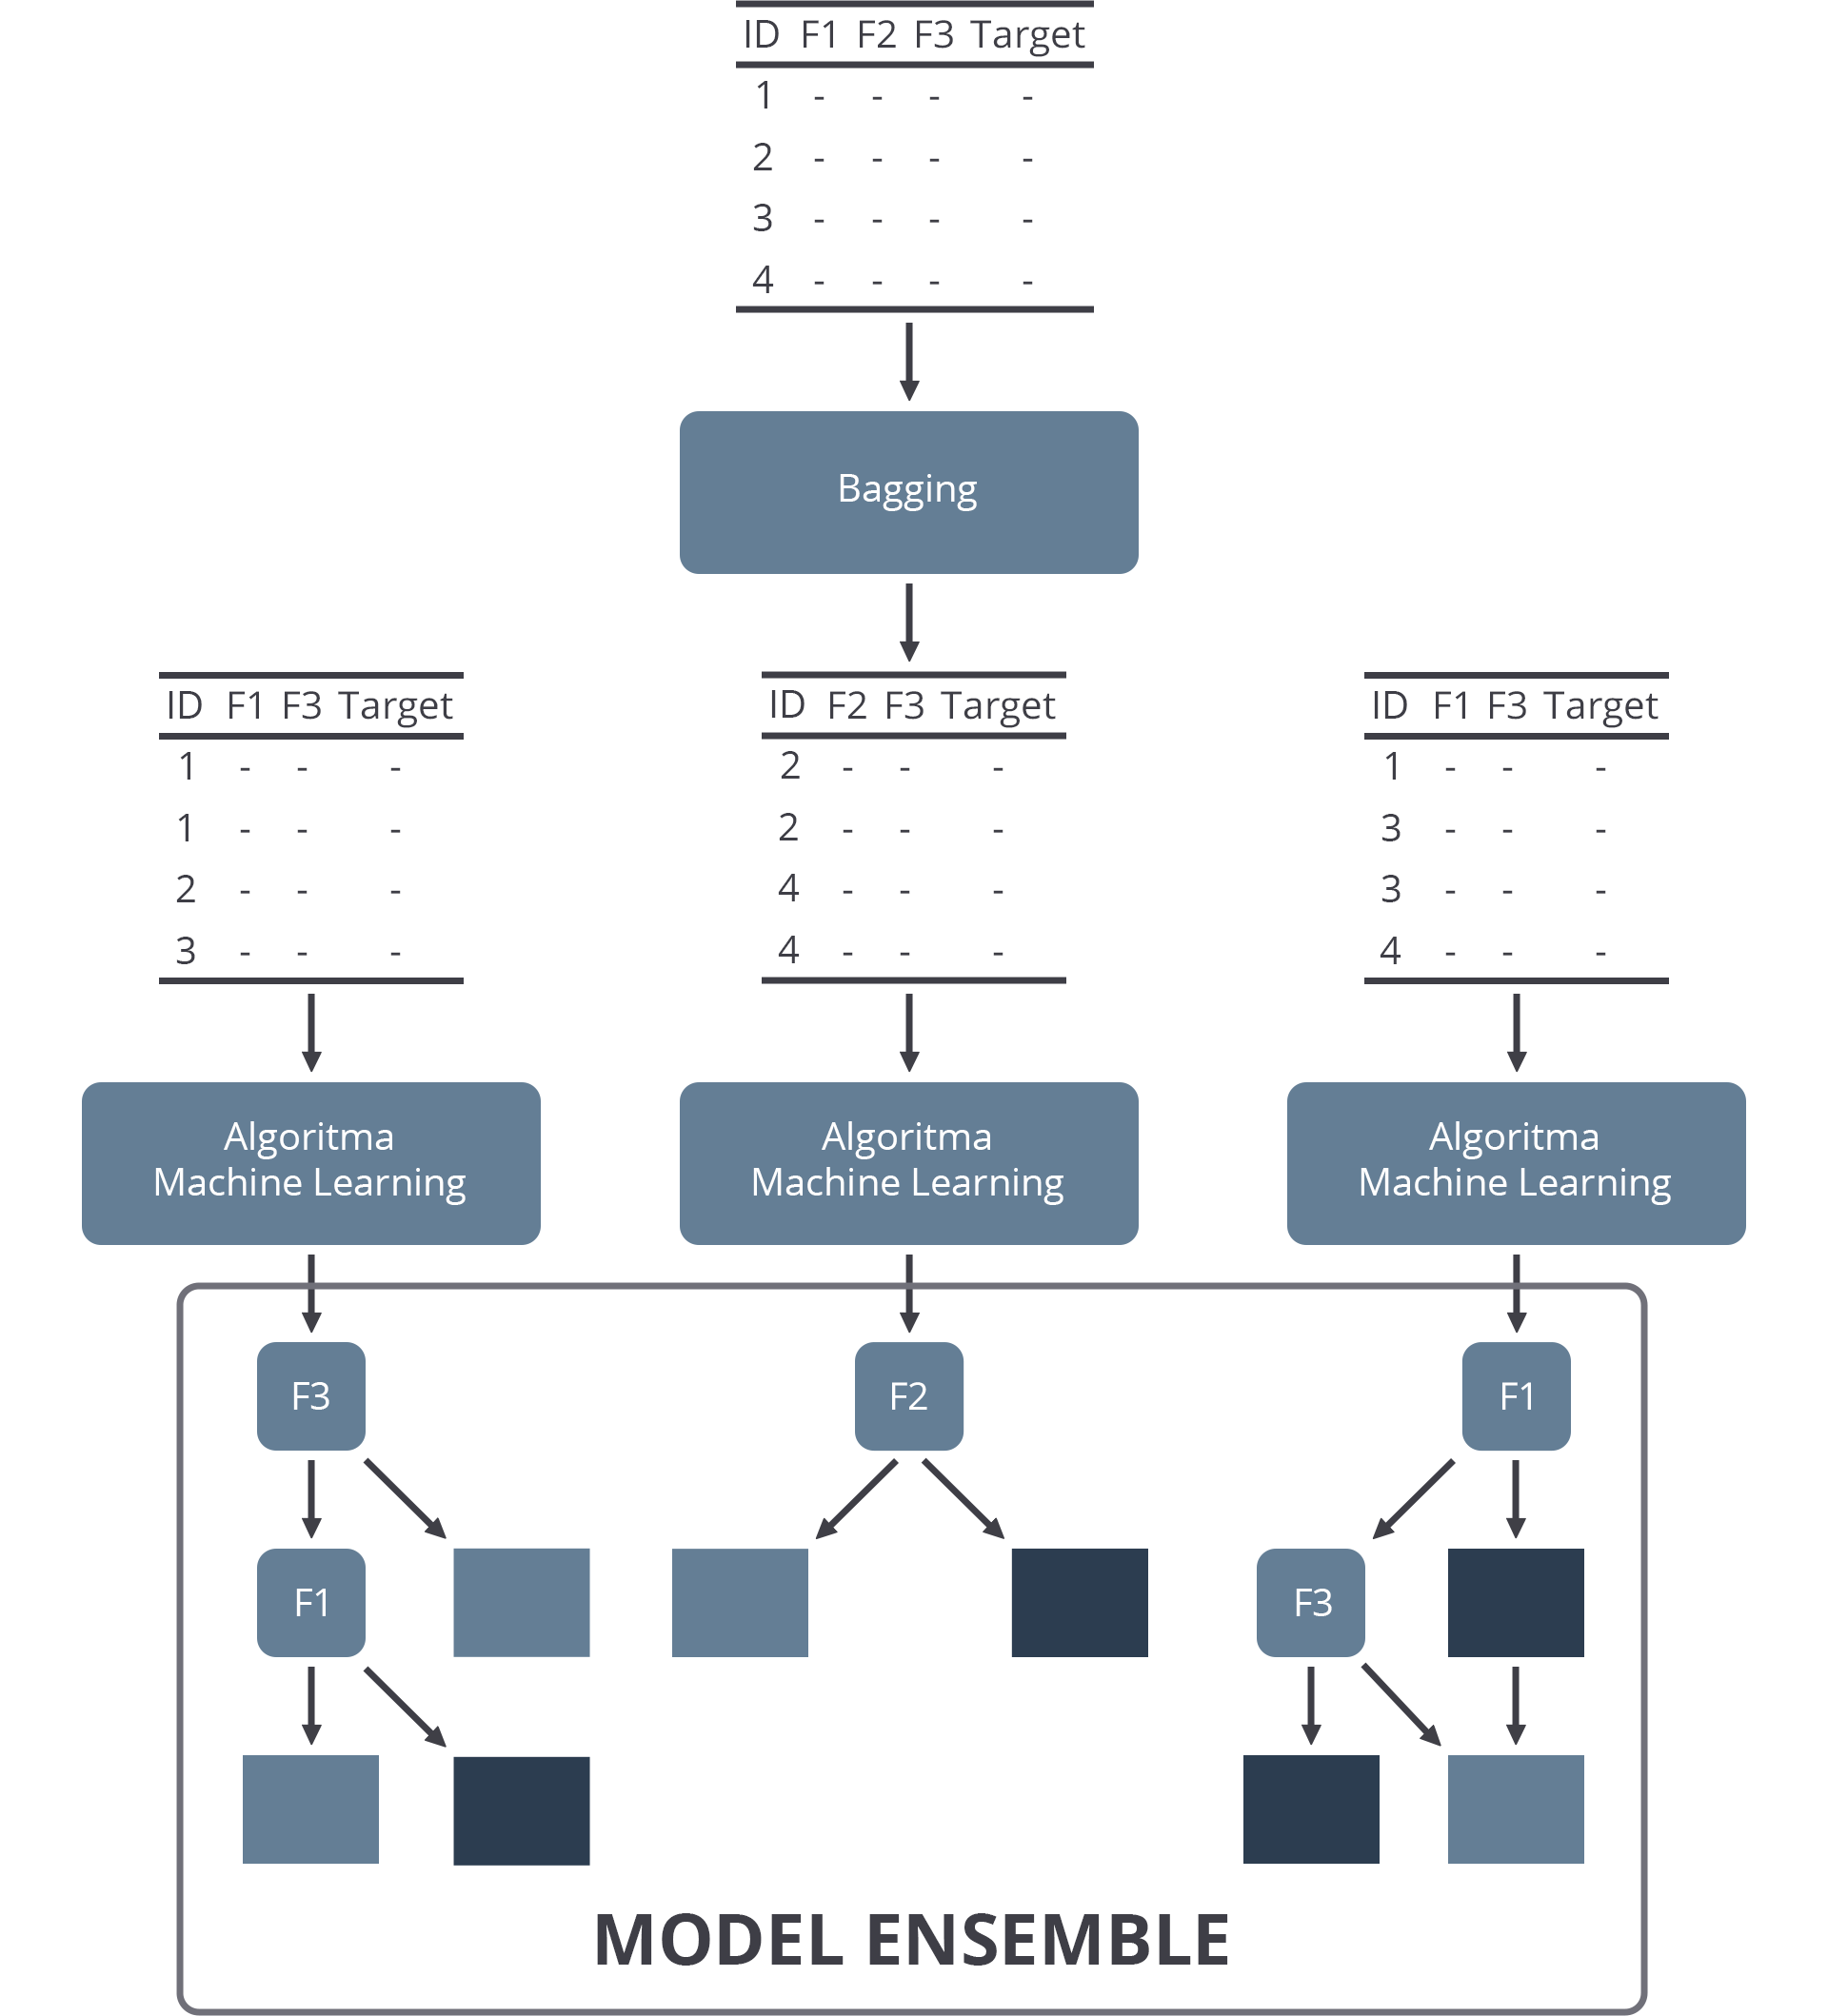

Algoritma yang cocok untuk teknik bagging ini adalah decision tree. Nah, random forest pada dasarnya adalah versi bagging dari algoritma decision tree. Bayangkan Anda memiliki satu bag (tas) random forest yang berisi beberapa model decision tree. Model decision tree masing-masing memiliki hyperparameter yang berbeda dan dilatih pada beberapa bagian (subset) data yang berbeda juga. Teknik pembagian data pada algoritma decision tree adalah memilih sejumlah fitur dan sejumlah sampel secara acak dari dataset yang terdiri dari n fitur dan m sampel.

Misalnya, ada 100 model decision tree pada bag random forest kita, ini berarti bahwa keputusan (decision) yang dibuat oleh setiap pohon (model) akan sangat bervariasi. Pada kasus klasifikasi, prediksi akhir diambil dari prediksi terbanyak pada seluruh pohon. Sedangkan, pada kasus regresi, prediksi akhir adalah rata-rata prediksi seluruh pohon dalam model ensemble.


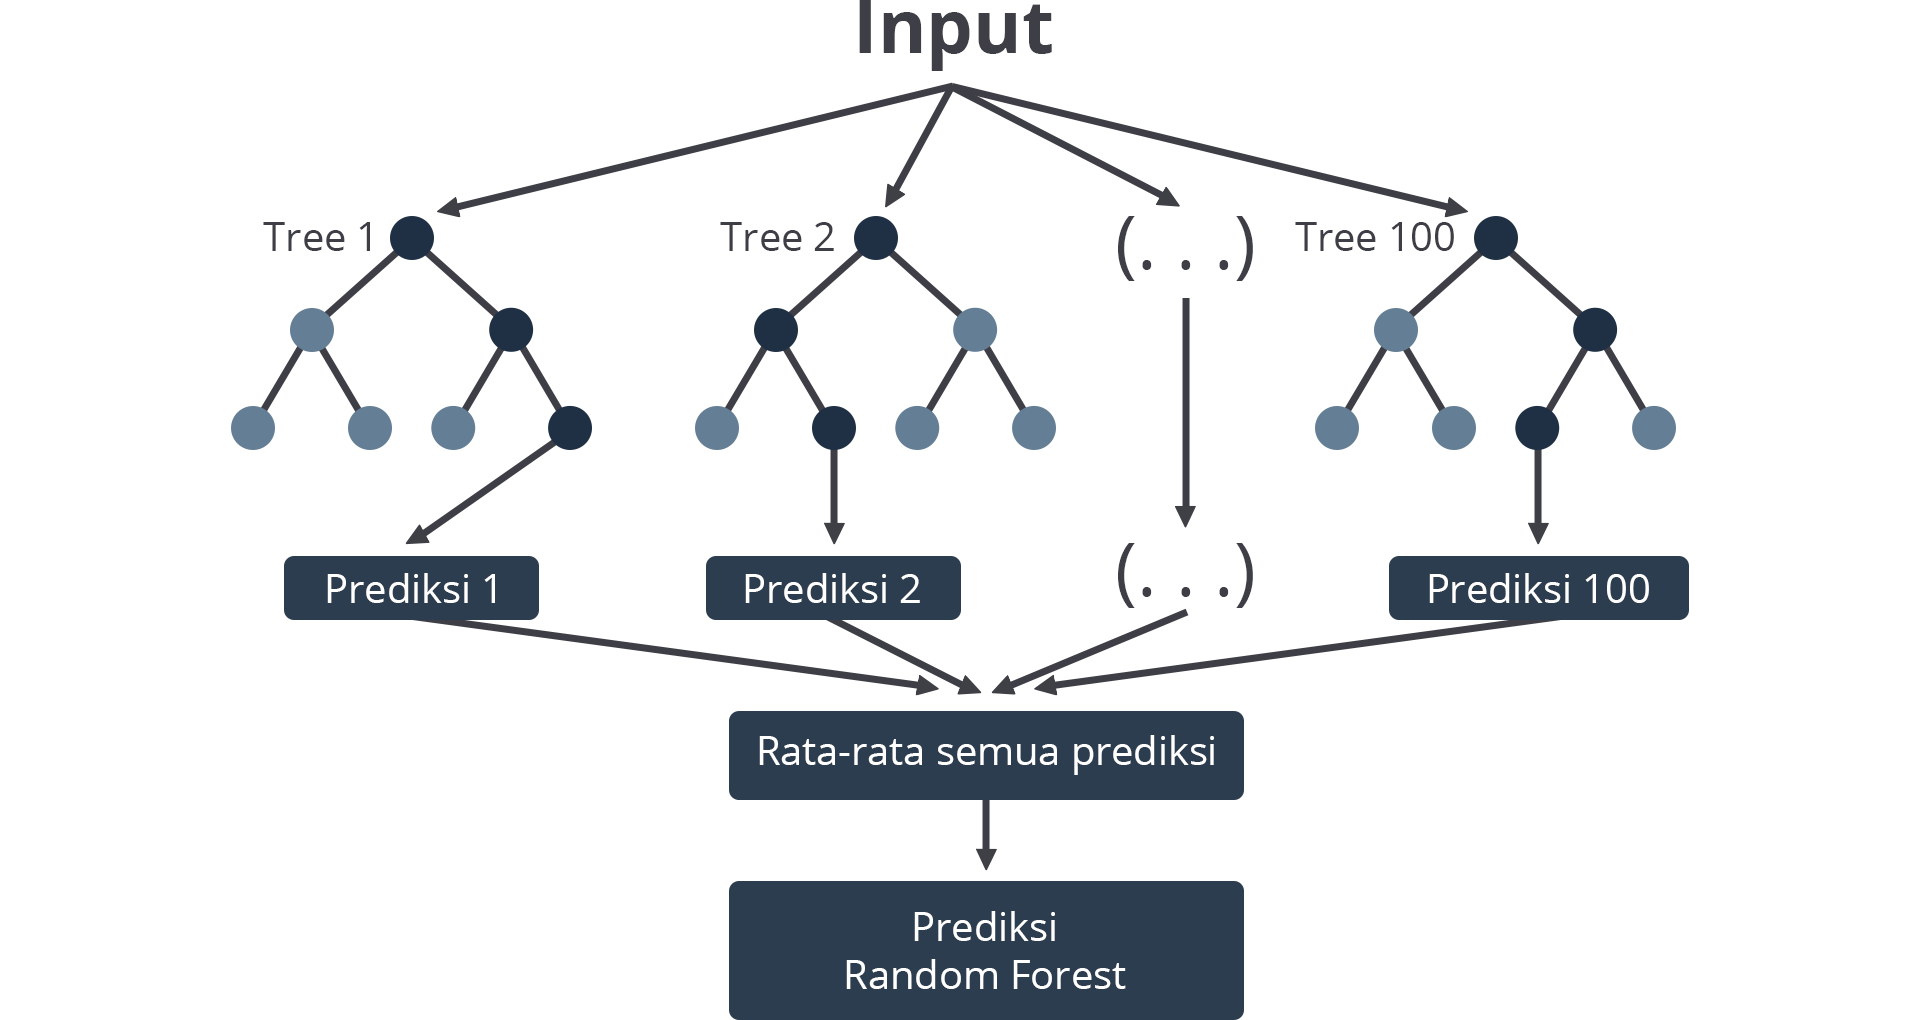

Sekarang tentu Anda mengerti, mengapa algoritma ini disebut sebagai random forest. Karena algoritma ini disusun dari banyak algoritma pohon (decision tree) yang pembagian data dan fiturnya dipilih secara acak.

Sampai di sini, mari kita lanjut menerapkan algoritma ini pada dataset menggunakan library scikit-learn.

In [ ]:
# import library yang di butuhkan

from sklearn.ensemble import RandomForestRegressor

# buat model untuk memprediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

Perhatikanlah potongan kode di atas. Pertama, Anda mengimpor RandomForestRegressor dari library scikit-learn. Anda juga mengimpor mean_squared_error sebagai metrik untuk mengevaluasi performa model. Selanjutnya, Anda membuat variabel RF dan memanggil RandomForestRegressor dengan beberapa nilai parameter. Berikut adalah parameter-parameter yang digunakan:

n_estimator: jumlah trees (pohon) di forest. Di sini kita set n_estimator=50.
* max_depth: kedalaman atau panjang pohon. Ia merupakan ukuran seberapa banyak pohon dapat membelah (splitting) untuk membagi setiap node ke dalam jumlah pengamatan yang diinginkan.
* random_state: digunakan untuk mengontrol random number generator yang digunakan.
* n_jobs: jumlah job (pekerjaan) yang digunakan secara paralel. Ia merupakan komponen untuk mengontrol thread atau proses yang berjalan secara paralel. n_jobs=-1 artinya semua proses berjalan secara paralel.